In [1]:
import pandas as pd #data manpulation
import numpy as np
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
import scipy

# 1) Cleaning + EDA + Standarization + Encoding 
import chardet #to detetmine dataset encoding

#preprocessing: replace numeric and categorical
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder # label (ordinal or nominal)
from sklearn.preprocessing import OrdinalEncoder # object (no order)
from sklearn.preprocessing import OneHotEncoder # categorical 

# data imbalanced
from imblearn.datasets import make_imbalance # undersampling
from sklearn.utils import resample # oversampling
from imblearn.over_sampling import SMOTE # SMOTE all are numeric
from imblearn.over_sampling import SMOTENC # smote categorical features

# 2) Standarize nad change dist of features
from sklearn.preprocessing import StandardScaler # scaling data so mean = 0 and std =  1 by ((x- u) / std)
from scipy import stats # for Box-Cox Transformation stats.boxcox(original_data)[0]
from mlxtend.preprocessing import minmax_scaling # for min_max scaling dont use it
#or
from sklearn.preprocessing import MinMaxScaler,normalize  #Tune input range to be 0 -> 1 by MinMaxScaler, same as above


# 3) feature enginerring
from sklearn.feature_selection import mutual_info_regression #mutal importance of feature
from sklearn.feature_selection import RFE, RFECV 
# a) numeric feature enginering
from sklearn.cluster import KMeans # Kmeans model for cluster feature
from scipy.spatial.distance import cdist # for elpow method
from sklearn.decomposition import PCA # for loadings and adding new feature
# b) categorical feature enginering
from category_encoders import MEstimateEncoder # have m estimator


# 4) Data Modeling = train test split then model then get error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, ShuffleSplit #also has cross_val_score (cv)
from sklearn.model_selection import RepeatedKFold # k fold cross validation it specify cv in corss_val_score dw
from sklearn.model_selection import cross_val_score # cv to get mean and see how much this feature affect the MAE error
# ML algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
# Bagging + Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Stacking Regression & CLassification
from vecstack import stacking # stacking Regression
from mlxtend.classifier import StackingCVClassifier # stacking CLassification
import itertools # to make combo of stacks

# Evaluation for model
from sklearn.metrics import *
from sklearn.metrics import mean_absolute_error, mean_squared_error
#for accurace of regression use model.score(y_pred, y_test) mean_absolute_error, mean_squared_error

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
#for accurace of classification use precision, recall, f1, acc, classification_report, confusion_matrix, roc_curve (tpr, fpr) & roc_auc_score (AUC)

# you can use (cross_val_score == KFold) (like validation_split=0.1 to get validation_acc) for calssification or regression

#pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

# 5) Model summary = features importance and effect + sharp values
import eli5
from eli5.sklearn import PermutationImportance # feature importance
# from pdpbox import pdp, get_dataset, info_plots #for pdp plots
import shap  # package used to calculate Shap values
import time

# 6) DNN & images & audio visualize
import tensorflow as tf
import cv2
import IPython

C:\Users\ahmed\.conda\envs\machine_learning\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


# 1) Start with Data
* features understand
* dtypes
* Error->NaN
* describe

In [2]:
file = open('train.csv', 'rb')
result = chardet.detect(file.read(10000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
df = pd.read_csv('train.csv', encoding=result['encoding']) # ?^86%
df_test = pd.read_csv('test.csv', encoding=result['encoding'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
columns = df.columns
# passengerId: unique will be droped till submission
# Survived is our target: 0(No) - 1(Yes)
# Pclass: Ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd ** 
# Name: passanger name
# sex: M / F ** 
# Age: years old of passanger
# SibSp:  # of siblings / spouses aboard the Titanic
# Parch: # of parents / children aboard the Titanic
# Ticket: Ticket number
# Fare: Passenger fare
# Cabin: Cabin number
# Embarked: Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# dtypes - cabin/Embarked/Age have Nulls
df.info() # all dtypes are correct except age solved after removing NaN as NaNs make int column become float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Errors -> NaN
for col in columns: # Id & Name & Ticket will be droped - sex/Pclass are good and no outliers
                    # Fare has value=0  which is incorrect + Age have (0.83, and so on) bad values
                    # Capin - Embarked - Age have NaNs (Age should be intger)
                    # No Data inconsistency
    print(col+': has', df[col].nunique(), 'uniques')
    try:
        print(sorted(df[col].unique()))
    except:
        print(df[col].unique())
    print()

PassengerId: has 891 uniques
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216

In [7]:
# Id & Name & Ticket will be droped - sex/Pclass are good and no outliers
# Fare has value=0  which is incorrect + Age have (0.83, and so on) bad values so round them
# Capin - Embarked - Age have NaNs (Age should be intger)
# cabin/Embarked/Age/Fare have Nulls

In [8]:
df_test_passId = df_test['PassengerId']
droped_cols = ['PassengerId', 'Name', 'Ticket']
df.drop(droped_cols, axis=1, inplace=True)
df_test.drop(droped_cols, axis=1, inplace=True)
df['Fare'] = df['Fare'].replace(0, np.nan)
df_test['Fare'] = df_test['Fare'].replace(0, np.nan)
# ages 0.83, 55.5 so round them
df['Age'] = np.round(df['Age'])
df_test['Age'] = np.round(df_test['Age'])
# sex/Pclass are good and no outliers ** 
# Capin - Embarked - Age - Faer have NaNs (Age is rounded so transform it to intger after replacing NaNs)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      876 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [10]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,876.000000
mean,0.383838,2.308642,29.693277,0.523008,0.381594,32.755650
std,0.486592,0.836071,14.524527,1.102743,0.806057,49.936826
min,0.000000,1.000000,0.000000,0.000000,0.000000,4.012500
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2) Cleaning
* duplicates
* NaN
* outliers
* data inconsistency

In [11]:
listo = df.duplicated()
print(sum(listo))
idx = np.where(listo == True)[0]
df.iloc[idx, :] # no duplicates

109


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
47,1,3,female,NaN,0,0,7.7500,NaN,Q
76,0,3,male,NaN,0,0,7.8958,NaN,S
77,0,3,male,NaN,0,0,8.0500,NaN,S
87,0,3,male,NaN,0,0,8.0500,NaN,S
95,0,3,male,NaN,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,NaN,S
877,0,3,male,19.0,0,0,7.8958,NaN,S
878,0,3,male,NaN,0,0,7.8958,NaN,S
884,0,3,male,25.0,0,0,7.0500,NaN,S


In [12]:
# Experiment 1&2
# df = df.drop_duplicates()
# df_test = df_test.drop_duplicates()
sum(df.duplicated()) # so remove duplicates 

109

In [13]:
# NaN columns 3 = {Cabin, Embarked, Age, Fare}
nan_cols = ['Cabin', 'Embarked', 'Age', 'Fare']
for col in nan_cols:
    print(col, df[col].dtype)
    print(df[col].isna().sum() * 100 / (df.shape[0])) # 77% of cabin is null so remove it already
    print()

Cabin object
77.10437710437711

Embarked object
0.2244668911335578

Age float64
19.865319865319865

Fare float64
1.6835016835016836



In [14]:
df = df.drop('Cabin', axis=1)
df_test = df_test.drop('Cabin', axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [15]:
# Impute NaN so make train_test_split + see distrbution first so will compute it after duplicates
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) # prevent dataleakge from the start
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
124,1,male,54.0,0,1,77.2875,S
141,3,female,22.0,0,0,7.7500,S
21,2,male,34.0,0,0,13.0000,S
650,3,male,NaN,0,0,7.8958,S
331,1,male,46.0,0,0,28.5000,S
...,...,...,...,...,...,...,...
400,3,male,39.0,0,0,7.9250,S
118,1,male,24.0,0,1,247.5208,C
701,1,male,35.0,0,0,26.2875,S
206,3,male,32.0,1,0,15.8500,S


In [16]:
columns = X_train.columns
nan_indices = []
for col in columns:
    listo = X_train[col].isna()
    idx = np.where(listo == True)[0]
    nan_indices.append(list(idx.flatten()))

my_nan_list = []
for i in range(len(nan_indices)):
    my_nan_list += nan_indices[i]
my_nan_list = set(my_nan_list)
my_nan_list = list(my_nan_list)
print(len(my_nan_list))
new_df_new = X_train.iloc[sorted(my_nan_list), :]
new_df_new.head(25)

131


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
650,3,male,NaN,0,0,7.8958,S
825,3,male,NaN,0,0,6.9500,Q
697,3,female,NaN,0,0,7.7333,Q
26,3,male,NaN,0,0,7.2250,C
739,3,male,NaN,0,0,7.8958,S
240,3,female,NaN,1,0,14.4542,C
578,3,female,NaN,1,0,14.4583,C
773,3,male,NaN,0,0,7.2250,C
306,1,female,NaN,0,0,110.8833,C
384,3,male,NaN,0,0,7.8958,S


 Min: 0.0 Max: 80.0 
 mean: 29.76553106212425 std: 14.83899989690337 
 median: 28.0 
 mode: 24.0


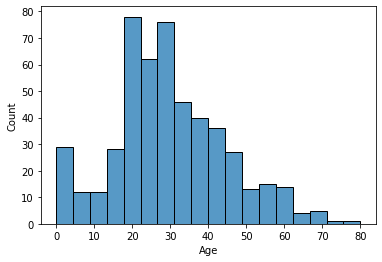

 Min: 4.0125 Max: 263.0 
 mean: 31.963334747145186 std: 42.04274036507781 
 median: 15.5 
 mode: 7.8958


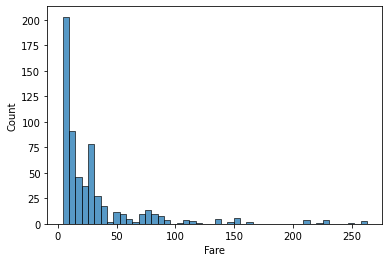

In [17]:
# now see dist of Age - Embarked
nan_cols.remove('Cabin')
numeric_cols = ['Age', 'Fare']
cat_cols = ['Embarked']
for col in numeric_cols:
    print(' Min:', X_train[col].min(), 'Max:', X_train[col].max(), '\n mean:', X_train[col].mean(), 'std:', X_train[col].std(),'\n', 'median:', X_train[col].median(), '\n', 'mode:', X_train[col].mode()[0])
    sns.histplot(X_train[col])
    plt.show()

**Age Normaly Distrbuted** but **Fare is right skewed** as it have outliers so replace

Age using mean/median/mode (but it should be intger so replaced by **Median**)

Fare is float but have outliers so remove it using **Median**

while Embarked is categorical so remove it using **Mode**

Group by df.groupby('Pclass', 'Sex')

In [18]:
columns = X_train.columns
cat_cols = []
numeric_cols = []
for col in columns:
    if X_train[col].dtype == 'object':
        cat_cols.append(col)
    else:
        numeric_cols.append(col)
numeric_cols, cat_cols

(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], ['Sex', 'Embarked'])

In [19]:
median_df = X_train.groupby(['Pclass', 'Sex']).median()
median_df

Age  SibSp  Parch      Fare
Pclass Sex                                 
1      female  33.0    0.0    0.0  86.50000
       male    43.0    0.0    0.0  43.35000
2      female  27.5    0.0    0.0  23.50000
       male    30.0    0.0    0.0  13.68125
3      female  22.0    0.0    0.0  11.13330
       male    26.0    0.0    0.0   8.05000

In [20]:
median_df.index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['Pclass', 'Sex'])

In [21]:
median_df.loc[(1, 'female'), 'Age']

33.0

In [22]:
mode_df = X_train.groupby(['Pclass', 'Sex'])['Embarked'].agg(pd.Series.mode)
mode_df # so mode

Pclass  Sex   
1       female    C
        male      S
2       female    S
        male      S
3       female    S
        male      S
Name: Embarked, dtype: object

In [23]:
mode_df.loc[(1, 'female')] # if 

'C'

In [24]:
def nan_replacment(row):
    median_age_value = median_df.loc[(row.Pclass, row.Sex), 'Age']
    median_fare_value = median_df.loc[(row.Pclass, row.Sex), 'Fare']
    mode_embarked_value = mode_df.loc[(row.Pclass, row.Sex)]
    if str(row['Age']) == 'nan':
        row['Age'] = median_age_value
    
    if str(row['Fare']) == 'nan':
        row['Fare'] = median_fare_value
        
    if str(row['Embarked']) == 'nan':
        row['Embarked'] = mode_embarked_value
    return row

X_train = X_train.apply(nan_replacment, axis='columns')
X_train['Age'] = X_train['Age'].astype('int32')

X_test = X_test.apply(nan_replacment, axis='columns')
X_test['Age'] = X_test['Age'].astype('int32')

df_test = df_test.apply(nan_replacment, axis='columns')
df_test['Age'] = df_test['Age'].astype('int32')
X_train.iloc[sorted(my_nan_list), :]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
650,3,male,26,0,0,7.8958,S
825,3,male,26,0,0,6.9500,Q
697,3,female,22,0,0,7.7333,Q
26,3,male,26,0,0,7.2250,C
739,3,male,26,0,0,7.8958,S
...,...,...,...,...,...,...,...
5,3,male,26,0,0,8.4583,Q
431,3,female,22,1,0,16.1000,S
65,3,male,26,1,1,15.2458,C
411,3,male,26,0,0,6.8583,Q


In [25]:
X_train.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 124 to 867
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    623 non-null    int64  
 1   Sex       623 non-null    object 
 2   Age       623 non-null    int32  
 3   SibSp     623 non-null    int64  
 4   Parch     623 non-null    int64  
 5   Fare      623 non-null    float64
 6   Embarked  623 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 36.5+ KB


Pclass
 Min: 1 Max: 3 
 mean: 2.2953451043338684 std: 0.8464570580540581 
 median: 3.0 
 mode: 3


<Figure size 504x1008 with 0 Axes>

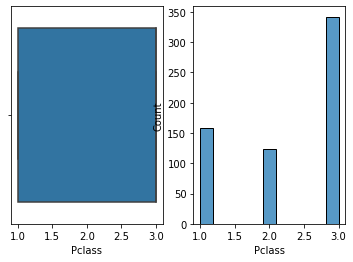

Age
 Min: 0 Max: 80 
 mean: 29.36597110754414 std: 13.624415299851567 
 median: 26.0 
 mode: 26


<Figure size 504x1008 with 0 Axes>

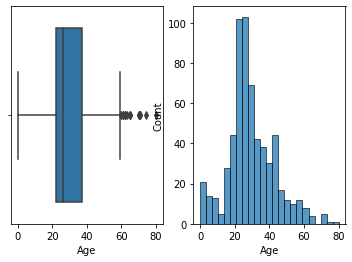

SibSp
 Min: 0 Max: 8 
 mean: 0.5184590690208668 std: 1.0513639286470813 
 median: 0.0 
 mode: 0


<Figure size 504x1008 with 0 Axes>

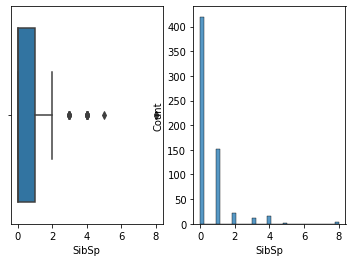

Parch
 Min: 0 Max: 5 
 mean: 0.3852327447833066 std: 0.8034733094048958 
 median: 0.0 
 mode: 0


<Figure size 504x1008 with 0 Axes>

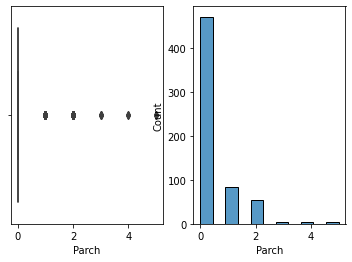

Fare
 Min: 4.0125 Max: 263.0 
 mean: 31.889916452648478 std: 41.75717656482626 
 median: 15.5 
 mode: 8.05


<Figure size 504x1008 with 0 Axes>

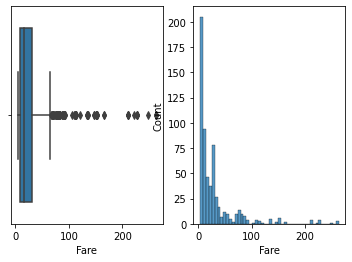

In [27]:
# outliers
columns = X_train.columns
for col in numeric_cols:
    plt.figure(figsize=(7, 14))
    fig, axes = plt.subplots(1, 2)
    print(col)
    print(' Min:', X_train[col].min(), 'Max:', X_train[col].max(), '\n mean:', X_train[col].mean(), 'std:', X_train[col].std(),'\n', 'median:', X_train[col].median(), '\n', 'mode:', X_train[col].mode()[0])
    sns.boxplot(x = X_train[col], ax=axes[0])
    sns.histplot(x = X_train[col], ax=axes[1])
    plt.show()

In [28]:
# Pclass no outliers nearly normal dist so leave it
# Age have some outliers but normal dist
# Pclass - Parch - SibSp are catgorical columns so dont remove it's outliers or see it's dist !!
# other Fare col is right skewed use log1p bcz have 0 value + large range(log)

 Min: 0.0 Max: 4.394449154672439 
 mean: 3.2701086500425625 std: 0.6348270317774404 
 median: 3.295836866004329 
 mode: 3.295836866004329


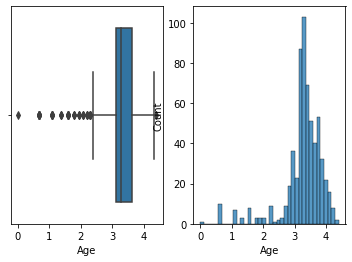

 Min: 1.6119347926326877 Max: 5.575949103146316 
 mean: 3.030067792471634 std: 0.8762846152340634 
 median: 2.803360380906535 
 mode: 2.2027647577118348


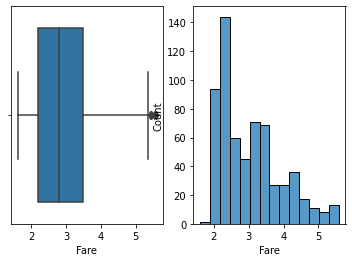

In [29]:
# lets try mathmatical transformer: log- 1/x - sqrt as values are large
outliers = ['Age', 'Fare']
for col in outliers:
    fig, axes = plt.subplots(1, 2)
    data = np.log1p(X_train[col]) # log1p(1 + 0.1) = 0.04
    sns.boxplot(x=data, ax=axes[0]) # random 4000 samples to show
    print(' Min:',data.min(), 'Max:', data.max(), '\n mean:', data.mean(), 'std:', data.std(),'\n', 'median:', data.median(), '\n', 'mode:', data.mode()[0])
    sns.histplot(x=data, ax=axes[1]) # right skewed with alot outliers
    plt.show()

In [30]:
# Age-sib-parent become bad dist so dont make log 
# Fare become nearly normal dist so make log on it only as it have large values
# and rest remove outliers using IQR (Experiment 3&4)

In [31]:
# data seems have still outlier at 8->10 so remove it using IQR bcz we have 'domain knowledge + obviouse outlier'
# target and item_visability are outliers
def remove_outlier(col):
    Q1, Q3 = col.quantile([0.25, 0.75]) #sorted inside quantile column then get Q1, Q3 at 25% and 75% of sorted col
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [32]:
X_train['Fare'] = np.log1p(X_train['Fare']) # used log and now remove outliers using IQR
X_test['Fare'] = np.log1p(X_test['Fare'])
df_test['Fare'] = np.log1p(df_test['Fare'])
# Experiment 3&4
outliers = ['Age', 'Fare']
outliers_treatment = []
# train data
for col in outliers:
    low_item_visability, high_item_visability = remove_outlier(X_train[col]) #lower and upper range
    outliers_treatment.append((col, low_item_visability, high_item_visability))
    
#     X_train[col] = np.where(X_train[col] < low_item_visability, low_item_visability, X_train[col])
#     X_train[col] = np.where(X_train[col] > high_item_visability, high_item_visability, X_train[col])
#     print(low_item_visability, high_item_visability)
#     fig, axes = plt.subplots(2, 1)
#     sns.boxplot(x=X_train[col], ax=axes[0])
#     print(' Min:',X_train[col].min(), 'Max:', X_train[col].max(), '\n mean:', X_train[col].mean(), 'std:', X_train[col].std(),'\n', 'median:', X_train[col].median(), '\n', 'mode:', X_train[col].mode()[0])
#     sns.histplot(x=X_train[col], ax=axes[1]) # right skewed with alot outliers
#     plt.show()
    
# # test data to prevent data leakage
# for (col, low_item_visability, high_item_visability) in outliers_treatment:
#     # outliers_treatment
#     X_test[col] = np.where(X_test[col] < low_item_visability, low_item_visability, X_test[col])
#     X_test[col] = np.where(X_test[col] > high_item_visability, high_item_visability, X_test[col])
#     # outliers_treatment of df_test
#     df_test[col] = np.where(df_test[col] < low_item_visability, low_item_visability, df_test[col])
#     df_test[col] = np.where(df_test[col] > high_item_visability, high_item_visability, df_test[col])

In [33]:
# no data inconsistency in categorical cols so save cleaned data
'''
1. dtypes are clear + No errors (Fare = 0 or age as float) + No duplicates + Noise columns or Full NaNs are removed.
2. X_train & X_test & df_test is imputed already by Groupby ^^.
3. X_test['Fare'] = np.log1p(X_test['Fare']) + IQR of training & Testing & df_test -> is already done.
4. No Data Inconsistency
'''
X_train.to_csv('X_train.csv', index=False)

# 3) EDA (Explinatory Data Analysis)

### Univariate Analysis

From EDA url

**For each variable (independant = (features) or dependant = (Label)) get 1, 2, 3 by a & b**

1) dtype, count, unique values

2) min, max, mean, median, mode, std

3) dist + skewness & count (pie or countplot) 


* a) numeric variable: distrbution of each feature.
* b) categorical variable: percentages by pie_chart (or) Groupby if high cardinality.

### bivariate Analysis

**Relation between independant variable and target (dependant variable)**

1) **corr matrix** by heatmap (remove one feature corr btn them is very large corr > 0.9, as they should be independant variables)

2) a, b & c

a) Numerical vs. Numerical
1. **Scatterplot**
2. Line plot (for trends)
3. Heatmap for correlation (correlation matrix) .corr
4. Joint plot

b) Categorical vs. Numerical
1. Bar chart
2. Violin plot
3. Categorical box plot
4. **Swarm plot**

c) Two Categorical Variables
1. **Bar chart**
2. Grouped bar chart
3. Point plot

### Multivariate Analysis

**just use pairplot**

 Min: 0 Max: 80 
 mean: 29.36597110754414 std: 13.624415299851567 
 median: 26.0 
 mode: 26


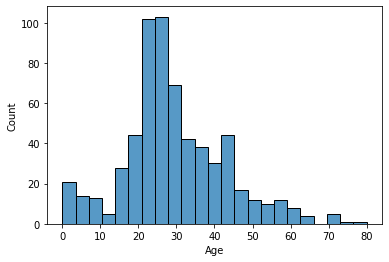

 Min: 1.6119347926326877 Max: 5.575949103146316 
 mean: 3.030067792471634 std: 0.8762846152340634 
 median: 2.803360380906535 
 mode: 2.2027647577118348


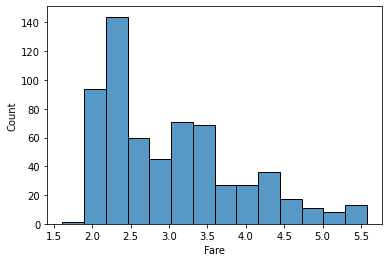

In [34]:
#### univariate analysis
# numeric: now we know dist of each variable
numeric_cols = ['Age', 'Fare']
cat_cols = cat_cols + ['Pclass', 'Parch', 'SibSp']
for col in numeric_cols:
    print(' Min:',X_train[col].min(), 'Max:', X_train[col].max(), '\n mean:', X_train[col].mean(), 'std:', X_train[col].std(),'\n', 'median:', X_train[col].median(), '\n', 'mode:', X_train[col].mode()[0])
    sns.histplot(x=X_train[col]) # right skewed with alot outliers
    plt.show()

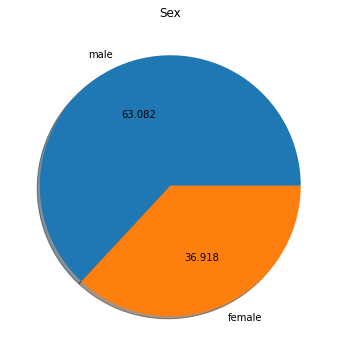

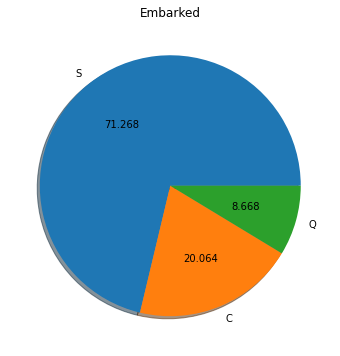

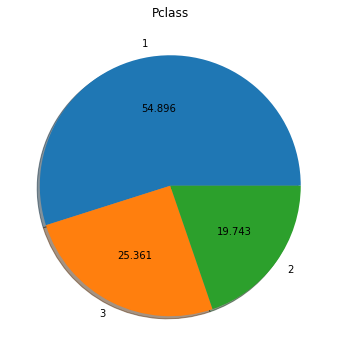

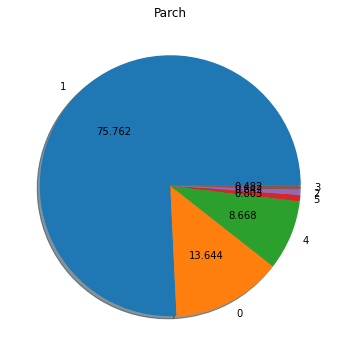

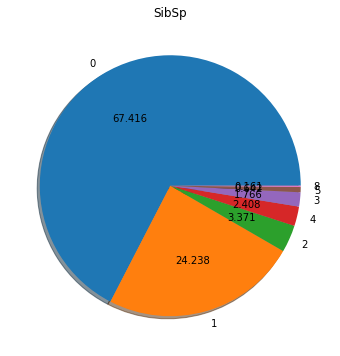

In [35]:
# Categorical outliers
for col in cat_cols:
    plt.figure(figsize=(6, 6))
    plt.title(col)
    plt.pie(X_train[col].value_counts(), labels=X_train[col].unique(), shadow=True, autopct='%.3f')
    plt.show()

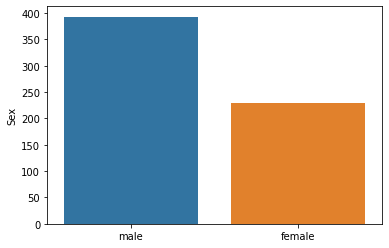

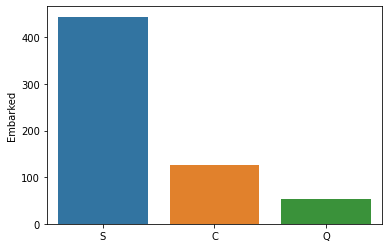

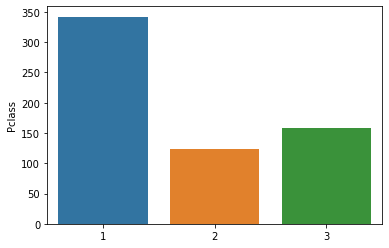

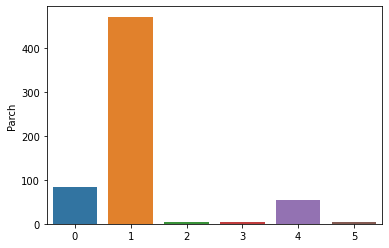

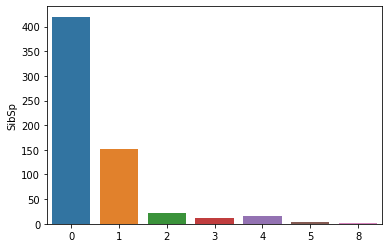

In [36]:
for col in cat_cols:
    sns.barplot(x=X_train[col].unique(), y=X_train[col].value_counts())
    plt.show()

Experiment 9&10
### No classification model as best one is Test_acc = 80% so deal with categorical outliers by:
* 1. replace them if you can (its easy as they are ordinal variables however nominal variable Q in  Embarked should be removed)
* 2. remove categories (so loss patterns)
* 3. class imbalanced using SMOTE-N (for categorical)
* 4. remove imbalanced

**Best Solutions was remove records & dont solve feature imbalanced**

In [37]:
# # 1) replace them
# categorical_outlier_remove = ['Embarked'] # as it's nomrinal variable with value Q
# categorical_outlier_replace = ['Parch', 'SibSp'] # as its ordinal variable
# for col in categorical_outlier_remove:
#     idx_train = X_train[X_train['Embarked'] == 'Q'].index
#     idx_test = X_test[X_test['Embarked'] == 'Q'].index
#     idx_dftest = df_test[df_test['Embarked'] == 'Q'].index
#     X_train.drop(idx_train, axis=0, inplace=True)
#     y_train.drop(idx_train, axis=0, inplace=True)
    
#     X_test.drop(idx_test, axis=0, inplace=True)
#     y_test.drop(idx_test, axis=0, inplace=True)
    
#     df_test.drop(idx_dftest, axis=0, inplace=True)

# idx_train = X_train[X_train['Parch'] > 2].index
# idx_test = X_test[X_test['Parch'] > 2].index
# idx_dftest = df_test[df_test['Parch'] > 2].index
# X_train['Parch'] = np.where(X_train['Parch'] > 2, 2, X_train['Parch'])
# X_test['Parch'] = np.where(X_test['Parch'] > 2, 2, X_test['Parch'])
# df_test['Parch'] = np.where(df_test['Parch'] > 2, 2, df_test['Parch'])

# idx_train = X_train[X_train['SibSp'] > 1].index
# idx_test = X_test[X_test['SibSp'] > 1].index
# idx_dftest = df_test[df_test['SibSp'] > 1].index
# X_train['SibSp'] = np.where(X_train['SibSp'] > 1, 1, X_train['SibSp'])
# X_test['SibSp'] = np.where(X_test['SibSp'] > 1, 1, X_test['SibSp'])
# df_test['SibSp'] = np.where(df_test['SibSp'] > 1, 1, df_test['SibSp'])

In [38]:
# for col in cat_cols:
#     sns.barplot(x=X_train[col].unique(), y=X_train[col].value_counts())
#     plt.show()

In [39]:
# # 2) remove categories
# categorical_outlier_remove = ['Embarked'] # as it's nomrinal variable with value Q
# categorical_outlier_replace = ['Parch', 'SibSp'] # as its ordinal variable
# for col in categorical_outlier_remove:
#     idx_train = X_train[X_train['Embarked'] == 'Q'].index
#     idx_test = X_test[X_test['Embarked'] == 'Q'].index
#     idx_dftest = df_test[df_test['Embarked'] == 'Q'].index
#     X_train.drop(idx_train, axis=0, inplace=True)
#     y_train.drop(idx_train, axis=0, inplace=True)
    
#     X_test.drop(idx_test, axis=0, inplace=True)
#     y_test.drop(idx_test, axis=0, inplace=True)
    
#     df_test.drop(idx_dftest, axis=0, inplace=True)

# idx_train = X_train[X_train['Parch'] > 2].index
# idx_test = X_test[X_test['Parch'] > 2].index
# idx_dftest = df_test[df_test['Parch'] > 2].index
# X_train.drop(idx_train, axis=0, inplace=True)
# y_train.drop(idx_train, axis=0, inplace=True)

# X_test.drop(idx_test, axis=0, inplace=True)
# y_test.drop(idx_test, axis=0, inplace=True)

# df_test.drop(idx_dftest, axis=0, inplace=True)

# idx_train = X_train[X_train['SibSp'] > 1].index
# idx_test = X_test[X_test['SibSp'] > 1].index
# idx_dftest = df_test[df_test['SibSp'] > 1].index
# X_train.drop(idx_train, axis=0, inplace=True)
# y_train.drop(idx_train, axis=0, inplace=True)

# X_test.drop(idx_test, axis=0, inplace=True)
# y_test.drop(idx_test, axis=0, inplace=True)

# df_test.drop(idx_dftest, axis=0, inplace=True)

In [40]:
# for col in cat_cols:
#     sns.barplot(x=X_train[col].unique(), y=X_train[col].value_counts())
#     plt.show()

In [41]:
# ## 3) class imbalanced (SMOTE) for catgorical

# target_data = X_train['Embarked']
# y_train_df = pd.DataFrame(y_train.values, columns=['Survived'], index=X_train.index)
# train_data = pd.concat([X_train.drop('Embarked', axis=1), y_train_df], axis=1)
# train_data

In [42]:
# from imblearn.over_sampling import SMOTENC # smote categorical
# smote_nc = SMOTENC(categorical_features=[0, 1, 3, 5, 6], random_state=5)
# X_train_3, y_train_3 = smote_nc.fit_resample(train_data, target_data)
# X_train_3['Embarked'] = y_train_3
# y_train_3 = X_train_3['Survived']
# X_train = X_train_3.drop('Survived', axis=1)
# y_train = y_train_3
# # print(sorted(Counter(y_resampled).items()))

In [43]:
# X_train['Embarked'].value_counts()

In [44]:
# y_train.value_counts()

In [45]:
# for col in cat_cols:
#     sns.barplot(x=X_train[col].unique(), y=X_train[col].value_counts())
#     plt.show()

---

In [46]:
# # 4) what about if we removed whole column
# remove_cat = ['Embarked', 'Parch', 'SibSp']
# X_train.drop(remove_cat, axis=1, inplace=True)
# X_test.drop(remove_cat, axis=1, inplace=True)
# df_test.drop(remove_cat, axis=1, inplace=True)

---

0    382
1    241
Name: Survived, dtype: int64


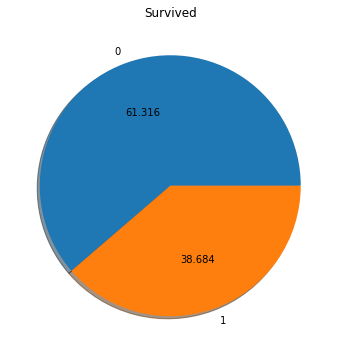

In [47]:
print(y_train.value_counts()) # target is balanced
plt.figure(figsize=(6, 6))
plt.title('Survived')
plt.pie(y_train.value_counts(), labels=y_train.unique(), shadow=True, autopct='%.3f')
plt.show()

<AxesSubplot:>

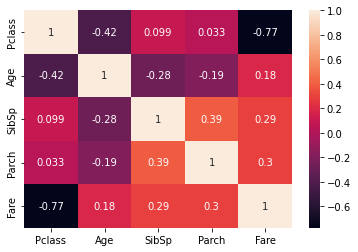

In [48]:
#### bivariate analysis
corr_matrix = X_train.corr() # cannot put y_train with it as target is 0, 1 categorical
sns.heatmap(corr_matrix, annot=True)

In [49]:
corr_matrix

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.416179,0.098644,0.033372,-0.773988
Age,-0.416179,1.000000,-0.276802,-0.186054,0.182995
SibSp,0.098644,-0.276802,1.000000,0.391241,0.286501
Parch,0.033372,-0.186054,0.391241,1.000000,0.299471
Fare,-0.773988,0.182995,0.286501,0.299471,1.000000


In [50]:
# corr > 0.9 are
for col in corr_matrix.columns:
    corr_matrix[col] = corr_matrix[col].map(lambda p: abs(p) > 0.9)
np.sum(np.sum(corr_matrix)) # so there are columns corrleated

5

In [51]:
dicto = {}
for col in corr_matrix.columns:
    dicto[str(col)] = corr_matrix.iloc[list(corr_matrix[col]), :].index
dicto # dicto says no corr betwen features and whole data so no corr columns to remove

{'Pclass': Index(['Pclass'], dtype='object'),
 'Age': Index(['Age'], dtype='object'),
 'SibSp': Index(['SibSp'], dtype='object'),
 'Parch': Index(['Parch'], dtype='object'),
 'Fare': Index(['Fare'], dtype='object')}

In [52]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
124,1,male,54,0,1,4.360388,S
141,3,female,22,0,0,2.169054,S
21,2,male,34,0,0,2.639057,S
650,3,male,26,0,0,2.185579,S
331,1,male,46,0,0,3.384390,S
...,...,...,...,...,...,...,...
400,3,male,39,0,0,2.188856,S
118,1,male,24,0,1,5.515527,C
701,1,male,35,0,0,3.306429,S
206,3,male,32,1,0,2.824351,S


16.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


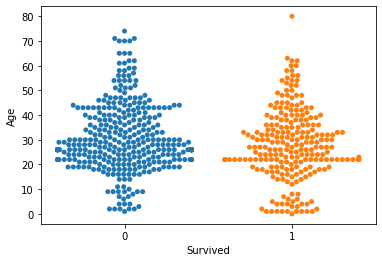

24.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


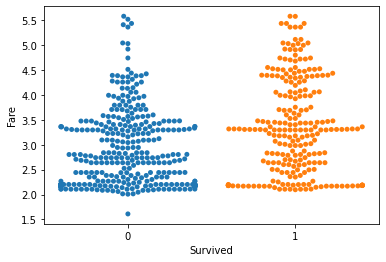

In [53]:
# numeric vs catgorical (target) so make swarm plot
for col in numeric_cols:
    sns.swarmplot(x=y_train, y=X_train[col]) # same range of survived and un (survivng doesnt depend on age)
    plt.show()

16.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


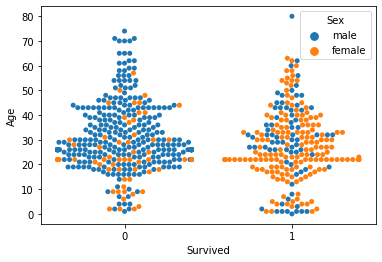

24.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


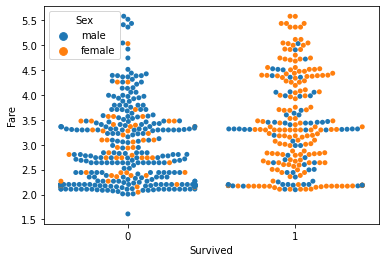

In [54]:
# numeric vs catgorical (target) so make swarm plot
for col in numeric_cols:
    sns.swarmplot(x=y_train, y=X_train[col], hue=X_train['Sex']) # females survived more than males with diff ages and fares
    plt.show() # Test_dist

Age


50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


<Figure size 720x720 with 0 Axes>

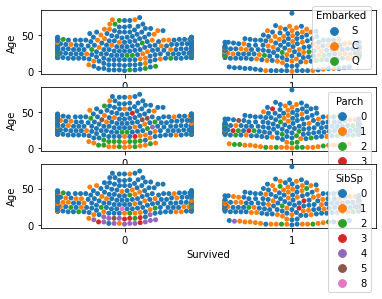


Fare


52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
24.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
24.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
24.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


<Figure size 720x720 with 0 Axes>

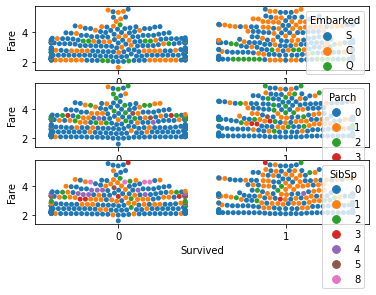

In [55]:
# numeric vs catgorical (target) so make swarm plot
for col in numeric_cols:
    print(col)
    plt.figure(figsize=(10, 10))
    fig, axes = plt.subplots(3, 1)
    sns.swarmplot(x=y_train, y=X_train[col], hue=X_train['Embarked'], ax=axes[0]) # same range of survived and un (survivng doesnt depend on age)
    sns.swarmplot(x=y_train, y=X_train[col], hue=X_train['Parch'], ax=axes[1])
    sns.swarmplot(x=y_train, y=X_train[col], hue=X_train['SibSp'], ax=axes[2])
    plt.show()
    print()

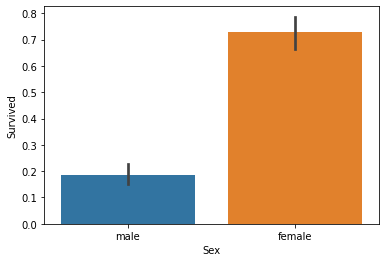

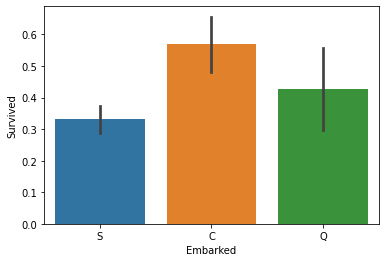

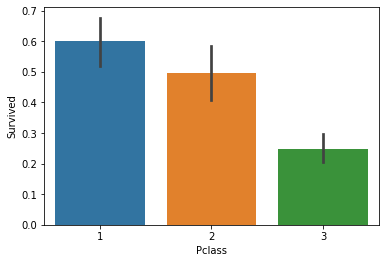

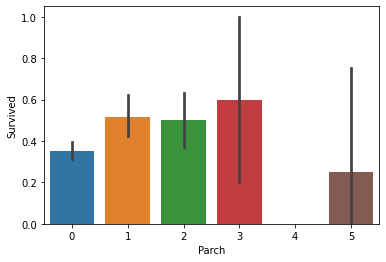

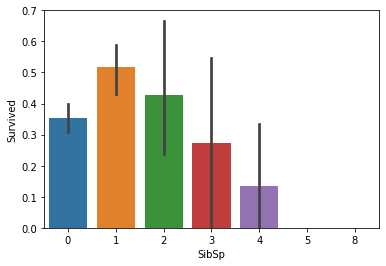

In [56]:
# categorical_feature vs catgorical (target) so make bar plot
for col in cat_cols:
    sns.barplot(x=X_train[col], y=y_train) # Female survived more than males + C Embarked survived more +Pclass=1 survived more 
    plt.show()

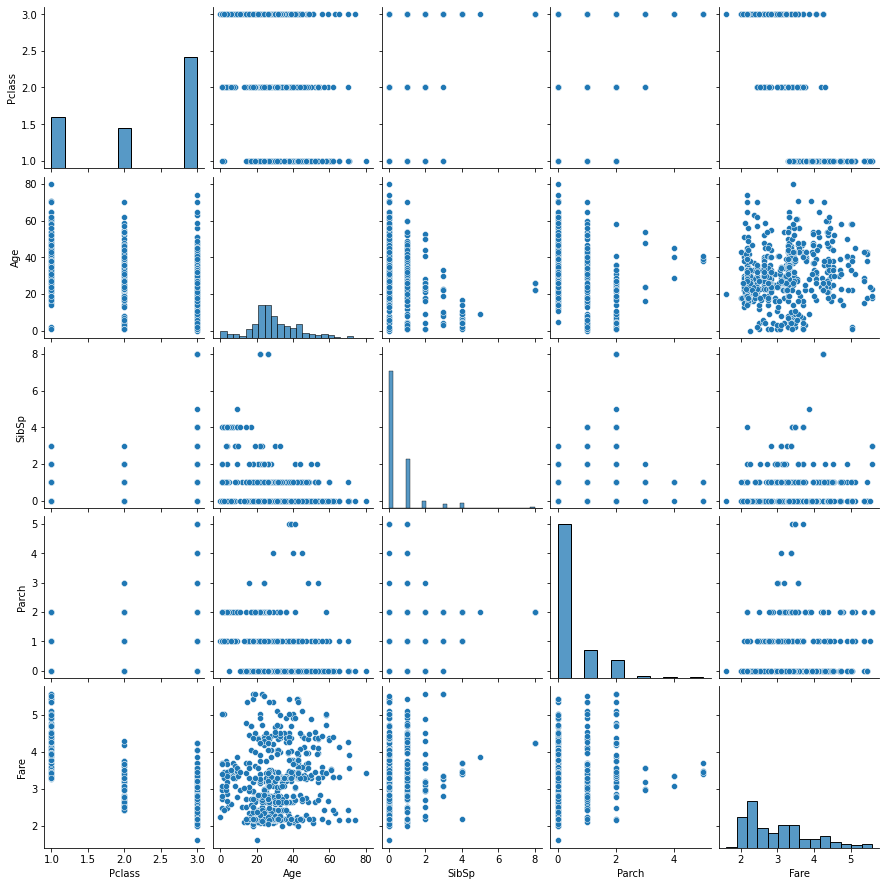

In [57]:
# multivariabe plot 
sns.pairplot(X_train) # Perfect

Females & Pclass=1 survived more according to train data so model could be biased to them (soln: augment data (upsample) but dont do it now)

# 4) Encoding
* 1) convert boolean (False -> 0, True -> 1) and break Texts
* 2) Ordinal and Nominal (**high cardinalities** -> (freq encoder or remove column) or **low cardinalities** -> (OrdinalEncoder - OneHotEncoder=pd.dummies)) and **Target Encoding** (label encoder encode alphabitcally)

In [58]:
X_train # convert sex male->M & female->F then both of them low cardinality & ordinal variables so make pd.dummies
# so curse of dim so PCA ^^

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
124,1,male,54,0,1,4.360388,S
141,3,female,22,0,0,2.169054,S
21,2,male,34,0,0,2.639057,S
650,3,male,26,0,0,2.185579,S
331,1,male,46,0,0,3.384390,S
...,...,...,...,...,...,...,...
400,3,male,39,0,0,2.188856,S
118,1,male,24,0,1,5.515527,C
701,1,male,35,0,0,3.306429,S
206,3,male,32,1,0,2.824351,S


In [59]:
X_train['Sex'] = X_train['Sex'].replace(['male', 'female'], ['M', 'F'])
X_test['Sex'] = X_test['Sex'].replace(['male', 'female'], ['M', 'F'])
df_test['Sex'] = df_test['Sex'].replace(['male', 'female'], ['M', 'F'])
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
124,1,M,54,0,1,4.360388,S
141,3,F,22,0,0,2.169054,S
21,2,M,34,0,0,2.639057,S
650,3,M,26,0,0,2.185579,S
331,1,M,46,0,0,3.384390,S
...,...,...,...,...,...,...,...
400,3,M,39,0,0,2.188856,S
118,1,M,24,0,1,5.515527,C
701,1,M,35,0,0,3.306429,S
206,3,M,32,1,0,2.824351,S


In [60]:
# Encoding as no boolean or text
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Sex', 'Embarked'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked'], drop_first=True)

# X_train = pd.get_dummies(X_train, columns=['Sex'], drop_first=True)
# X_test = pd.get_dummies(X_test, columns=['Sex'], drop_first=True)
# df_test = pd.get_dummies(df_test, columns=['Sex'], drop_first=True)
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_M,Embarked_Q,Embarked_S
124,1,54,0,1,4.360388,1,0,1
141,3,22,0,0,2.169054,0,0,1
21,2,34,0,0,2.639057,1,0,1
650,3,26,0,0,2.185579,1,0,1
331,1,46,0,0,3.384390,1,0,1
...,...,...,...,...,...,...,...,...
400,3,39,0,0,2.188856,1,0,1
118,1,24,0,1,5.515527,1,0,0
701,1,35,0,0,3.306429,1,0,1
206,3,32,1,0,2.824351,1,0,1


In [61]:
def OHE_transform_encoder(df):
    df['Sex_M'] = (df['Sex'] == 'M').astype('int32')
    df['Embarked_Q'] = (df['Embarked'] == 'Q').astype('int32')
    df['Embarked_S'] = (df['Embarked'] == 'S').astype('int32')
    df.drop(['Sex', 'Embarked'], axis = 1, inplace=True)
    return df

In [62]:
# X_test = OHE_transform_encoder(X_test)
# df_test = OHE_transform_encoder(df_test)

# 5) Feature Engineering

Note: **StandardScaler First for clusters_feature or PCA or modeling**

* 1) K_means cluster to get new feature (unsupervised learning) -> no need to cluster as target already clustered data (Experiment 5&6)

* 2) PCA to make dimension reduction (unsupervised learning) -> will try PCA

* 3) Select Features have MI > 0.2 or percentile

* 4) Add new features after you make baseline model First (2b2a 2ablnye lw 3mltha)

In [63]:
# standard scaler as features not in same range + mean!=0, std!=1
std_scale = StandardScaler()

columns = X_train.columns

X_train = std_scale.fit_transform(X_train) 
X_test = std_scale.transform(X_test)
df_test = std_scale.transform(df_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)
df_test = pd.DataFrame(df_test, columns=columns)
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_M,Embarked_Q,Embarked_S
count,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02
mean,-3.421554e-17,3.421554e-17,-3.991813e-17,-1.710777e-17,-9.979533e-17,5.702590e-18,3.991813e-17,-1.368622e-16
std,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00
min,-1.531544e+00,-2.157125e+00,-4.935262e-01,-4.798446e-01,-1.619648e+00,-1.307171e+00,-3.080639e-01,-1.574943e+00
25%,-1.531544e+00,-5.410794e-01,-4.935262e-01,-4.798446e-01,-9.448617e-01,-1.307171e+00,-3.080639e-01,-1.574943e+00
50%,8.331446e-01,-2.472529e-01,-4.935262e-01,-4.798446e-01,-2.589222e-01,7.650109e-01,-3.080639e-01,6.349434e-01
75%,8.331446e-01,5.607700e-01,4.583835e-01,-4.798446e-01,5.073490e-01,7.650109e-01,-3.080639e-01,6.349434e-01
max,8.331446e-01,3.719405e+00,7.121751e+00,5.748138e+00,2.907648e+00,7.650109e-01,3.246080e+00,6.349434e-01


In [64]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 35)
# distortion: distance between centers 
# inertia: distance of same sample
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train)
  
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0]) 
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0]
    mapping2[k] = kmeanModel.inertia_

print('distortion values:')
for key, val in mapping1.items():
    print(f'{key} : {val}')
print()
print('inertia values:')
for key, val in mapping2.items():
    print(f'{key} : {val}')

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than

distortion values:
1 : 2.6351632837189816
2 : 2.3020667012886182
3 : 2.058030906872698
4 : 1.831869849385985
5 : 1.6907441387395696
6 : 1.5811130296971894
7 : 1.5134547754008074
8 : 1.433088583563339
9 : 1.3841879296723043
10 : 1.338415296410577
11 : 1.2986388530477477
12 : 1.2752607878602829
13 : 1.2312372541994374
14 : 1.193180895138443
15 : 1.1413892865137587
16 : 1.1150342047089545
17 : 1.1261595824963466
18 : 1.0620619671475788
19 : 1.0247891281061996
20 : 1.022951103086489
21 : 0.9837111223184684
22 : 0.968264855260867
23 : 0.9534249857799955
24 : 0.9467547429501485
25 : 0.9347965503925352
26 : 0.8878192234623066
27 : 0.8858153700330768
28 : 0.8653909081951506
29 : 0.8602845840915821
30 : 0.8399103846504902
31 : 0.840719049954318
32 : 0.8249103598810082
33 : 0.8134137631394507
34 : 0.8054591432624746

inertia values:
1 : 4983.999999999999
2 : 3961.1173119197897
3 : 3192.640690807205
4 : 2516.2650129348567
5 : 2222.035292873902
6 : 1994.3607276825705
7 : 1783.6667496391885
8 : 162

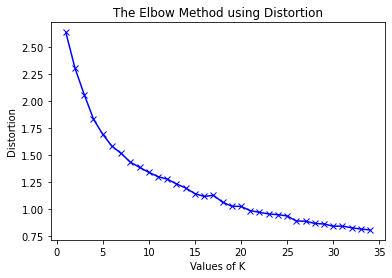

In [65]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

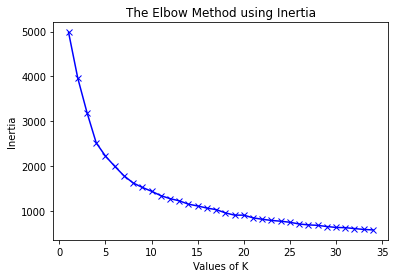

In [66]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [67]:
# 1) KMeans: 20 is good value
# Experiments 5&6 
kmeans = KMeans(n_clusters=10, random_state=5) # hyperparameter !! Try and Error (Experiments 5&6)

X_train["Cluster"] = kmeans.fit_predict(X_train)
X_test["Cluster"] = kmeans.predict(X_test) # prevent data leakage
df_test["Cluster"] = kmeans.predict(df_test) # prevent data leakage

X_train["Cluster"] = X_train["Cluster"].astype("int32")
X_test["Cluster"] = X_test["Cluster"].astype("int32")
df_test["Cluster"] = df_test["Cluster"].astype("int32")

X_train

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.


,Pclass,Age,SibSp,Parch,Fare,Sex_M,Embarked_Q,Embarked_S,Cluster
0,-1.531544,1.809533,-0.493526,0.765752,1.519357,0.765011,-0.308064,0.634943,6
1,0.833145,-0.541079,-0.493526,-0.479845,-0.983363,-1.307171,-0.308064,0.634943,5
2,-0.349200,0.340400,-0.493526,-0.479845,-0.446573,0.765011,-0.308064,0.634943,1
3,0.833145,-0.247253,-0.493526,-0.479845,-0.964489,0.765011,-0.308064,0.634943,1
4,-1.531544,1.221880,-0.493526,-0.479845,0.404671,0.765011,-0.308064,0.634943,6
...,...,...,...,...,...,...,...,...,...
618,0.833145,0.707683,-0.493526,-0.479845,-0.960747,0.765011,-0.308064,0.634943,1
619,-1.531544,-0.394166,-0.493526,0.765752,2.838639,0.765011,-0.308064,-1.574943,4
620,-1.531544,0.413857,-0.493526,-0.479845,0.315631,0.765011,-0.308064,0.634943,6
621,0.833145,0.193487,0.458383,-0.479845,-0.234949,0.765011,-0.308064,0.634943,1


In [68]:
std_scale_cluster = StandardScaler()

columns = X_train.columns

listo = np.array(X_train['Cluster']).reshape(-1, 1) # added 1 more axis to pass to std_scaler
listo_test = np.array(X_test['Cluster']).reshape(-1, 1)
listo_df_test = np.array(df_test['Cluster']).reshape(-1, 1)
X_train['Cluster'] = std_scale_cluster.fit_transform(listo)
X_test['Cluster'] = std_scale_cluster.transform(listo_test)
df_test['Cluster'] = std_scale_cluster.transform(listo_df_test)

X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_M,Embarked_Q,Embarked_S,Cluster
count,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02
mean,-3.421554e-17,3.421554e-17,-3.991813e-17,-1.710777e-17,-9.979533e-17,5.702590e-18,3.991813e-17,-1.368622e-16,-2.708730e-17
std,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00
min,-1.531544e+00,-2.157125e+00,-4.935262e-01,-4.798446e-01,-1.619648e+00,-1.307171e+00,-3.080639e-01,-1.574943e+00,-1.351674e+00
25%,-1.531544e+00,-5.410794e-01,-4.935262e-01,-4.798446e-01,-9.448617e-01,-1.307171e+00,-3.080639e-01,-1.574943e+00,-9.897951e-01
50%,8.331446e-01,-2.472529e-01,-4.935262e-01,-4.798446e-01,-2.589222e-01,7.650109e-01,-3.080639e-01,6.349434e-01,-2.660365e-01
75%,8.331446e-01,5.607700e-01,4.583835e-01,-4.798446e-01,5.073490e-01,7.650109e-01,-3.080639e-01,6.349434e-01,8.196014e-01
max,8.331446e-01,3.719405e+00,7.121751e+00,5.748138e+00,2.907648e+00,7.650109e-01,3.246080e+00,6.349434e-01,1.905239e+00


In [69]:
# 2) PCA
# Experiment 7&8
from IPython.display import display

def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [70]:
# # Create principal components
# pca = PCA(random_state=5)

# features = X_train.columns # apply PCA to all X_train Features

# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# df_test = pca.transform(df_test)

# # Convert to dataframe
# # component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
# component_names = []
# for i in range(len(features)):
#     component_names.append('PC' + str(i+1))
# X_train = pd.DataFrame(X_train, columns=component_names)
# X_test = pd.DataFrame(X_test, columns=component_names)
# df_test = pd.DataFrame(df_test, columns=component_names)
# X_train.describe()

In [71]:
# loadings = pd.DataFrame(
#     pca.components_.T,  # transpose the matrix of loadings
#     columns=component_names,  # so the columns are the principal components
#     index=features,  # and the rows are the original features
# )
# loadings

In [72]:
# # Look at explained variance
# plot_variance(pca)

In [73]:
# 3) MI scores to select relevent features
mi_scores = make_mi_scores(X_train, y_train, discrete_features=False)
mi_scores

Sex_M         0.153693
Cluster       0.149218
Fare          0.097728
Pclass        0.068553
Embarked_S    0.034784
Age           0.032990
SibSp         0.001919
Parch         0.000000
Embarked_Q    0.000000
Name: MI Scores, dtype: float64

In [74]:
# # chose features
# # explore the algorithm wrapped by RFE
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import Perceptron
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot
 
# # get the dataset
# def get_dataset():
#     X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
#     return X, y
 
# # get a list of models to evaluate
# def get_models():
#     models = dict()
#     # lr
#     rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
#     model = DecisionTreeClassifier()
#     models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
#     # perceptron
#     rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
#     model = DecisionTreeClassifier()
#     models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
#     # cart
#     rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
#     model = DecisionTreeClassifier()
#     models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
#     # rf
#     rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
#     model = DecisionTreeClassifier()
#     models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
#     # gbm
#     rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
#     model = DecisionTreeClassifier()
#     models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
#     return models
 
# # evaluate a give model using cross-validation
# def evaluate_model(model, X, y):
#     cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#     scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
#     return scores
 
# # define dataset
# X, y = get_dataset()
# # get the models to evaluate
# models = get_models()
# # evaluate the models and store results
# results, names = list(), list()
# for name, model in models.items():
#     scores = evaluate_model(model, X, y)
#     results.append(scores)
#     names.append(name)
#     print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()

In [75]:
# 4) I won't add features hya kda
# log(age * 2 + Pclass / 3)

# 6) Modeling

**Underfit soln**: more complex (increase layers/units) - more points - search for another arch 

**Overfit soln**: regularization - more points (un-biased / augmentation) - search for another arch

* 1) Try all calssification model get best baseline acc
* 2) hyperparameters tunning (random + gridsearch)
* 3) Evalution metric to descide which is best
* 4) Try all experiments you want to make

In [76]:
# Logestic_regreesion - SVM - Naive Bayes classifier - DT - (Boosting)RF - (Boosting)XGBoost - KNN => Classifcation

In [77]:
def classification_result(y_test, y_pred, prob, plot_roc=True):
    print('Test Accuracy:', accuracy_score(y_test, y_pred) * 100)
    print('F1 score:', f1_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))
    clf_report = classification_report(y_test, y_pred, target_names=['Dead','Survived'], output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
    plt.show()
    print()
    print()
    print()
    
    if plot_roc == True:
        #curve of TPR vs FPR on Ytest vs predictions of knn_model
        plt.style.use('seaborn') #use seaborn style
        fpr, tpr, thershold = roc_curve(y_test, prob)
        # auc_value = roc_auc_score(y_test, y_pred)
        auc_value = auc(fpr, tpr)
        template_str = "AUC = {}".format(auc_value)
        #plot
        plt.plot(fpr, tpr, 'g-', label="AUC = %0.2f" % auc_value)
        #properties
        plt.grid()
        plt.legend(loc = 'lower right')
        plt.xlabel("False Postive Rate")
        plt.ylabel("True Postive Rate")
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.title('Receiver Operating Characteristic')
        plt.show()

#### 1) XGBoost model

XGBoost: 1st tree get preds & losses => losses fit for another tree/model **boosted_2nd_model** to predict losses then final tree (pred of 2nd tree/model (loss) + pred of 1st tree/model (pred) = nearly correct value)

2nd model fit on Gradient of (Loss to pred of prev_tree) = d(L)/d(y_hat) like NN

**use Gradient Descent in minmizing dLoss/dy_hat_prev** Gradient Boosting model :)

Test Accuracy: 82.08955223880598
F1 score: 0.7419354838709677
Recall: 0.6831683168316832
Precision: 0.8117647058823529

 confussion matrix:
 [[151  16]
 [ 32  69]]


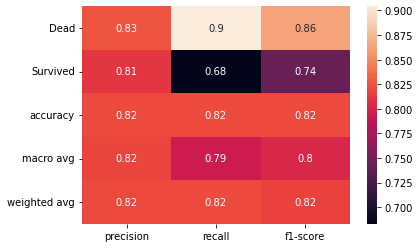

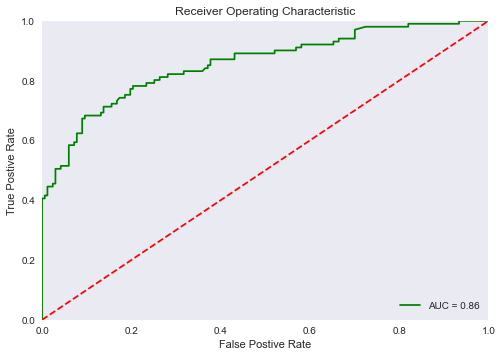

In [78]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
y_pred_prob = xgbc.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob)

#### 2) Knn model

Test Accuracy: 82.08955223880598
F1 score: 0.7473684210526316
Recall: 0.7029702970297029
Precision: 0.797752808988764

 confussion matrix:
 [[149  18]
 [ 30  71]]


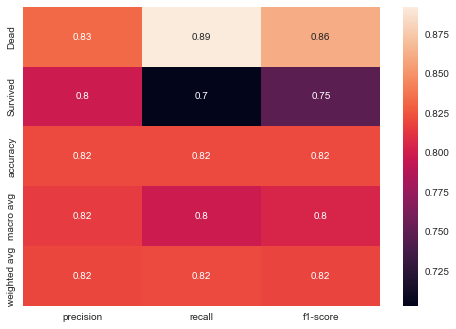

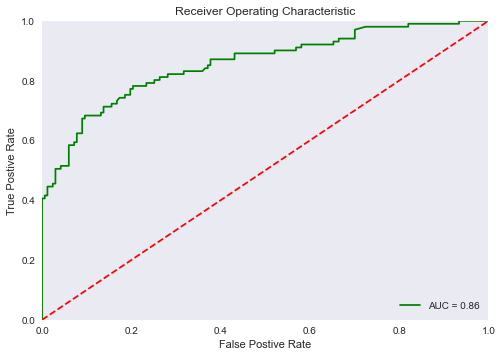

In [79]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_prob = xgbc.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob)

#### 3) RF

Test Accuracy: 82.08955223880598
F1 score: 0.7473684210526316
Recall: 0.7029702970297029
Precision: 0.797752808988764

 confussion matrix:
 [[149  18]
 [ 30  71]]


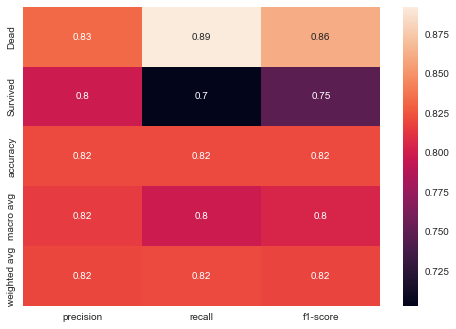

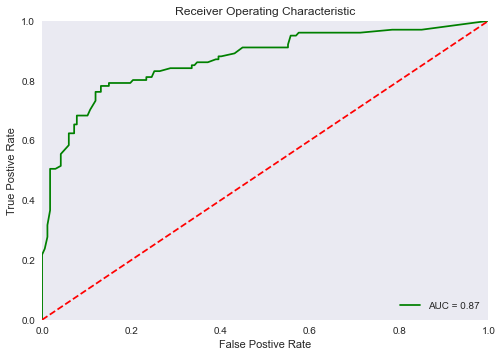

In [80]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train.values.ravel())
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob)

#### 4) DT

Test Accuracy: 80.97014925373134
F1 score: 0.7411167512690354
Recall: 0.7227722772277227
Precision: 0.7604166666666666

 confussion matrix:
 [[144  23]
 [ 28  73]]


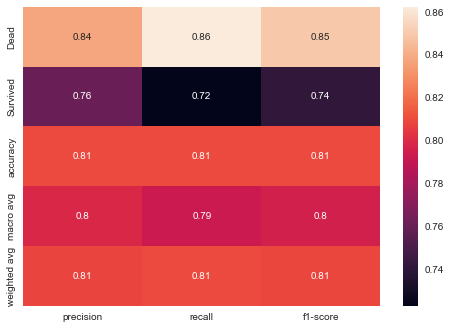

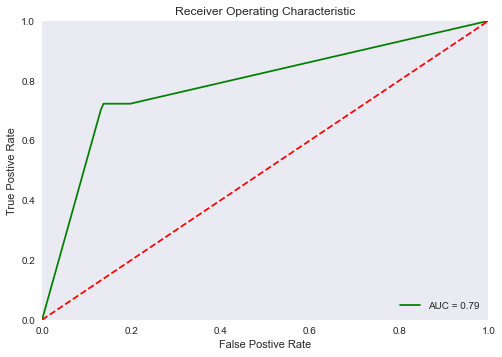

In [81]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train.values.ravel())
y_pred = DT_model.predict(X_test)
y_pred_prob = DT_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob)

#### 5) Naive Bayes classifier

Test Accuracy: 81.34328358208955
F1 score: 0.7549019607843138
Recall: 0.7623762376237624
Precision: 0.7475728155339806

 confussion matrix:
 [[141  26]
 [ 24  77]]


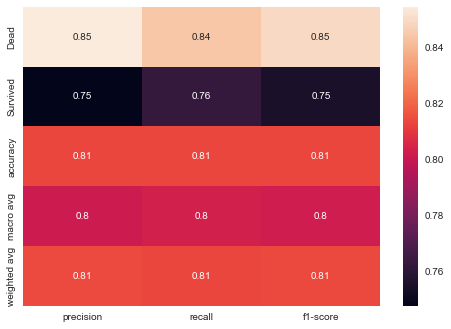

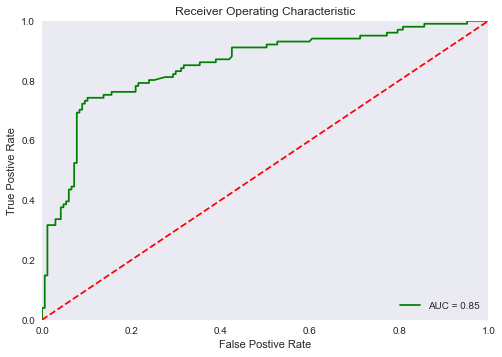

In [82]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_pred = NB_model.predict(X_test)
y_pred_prob = NB_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob)

#### 6) SVM

Test Accuracy: 83.95522388059702
F1 score: 0.7597765363128492
Recall: 0.6732673267326733
Precision: 0.8717948717948718

 confussion matrix:
 [[157  10]
 [ 33  68]]


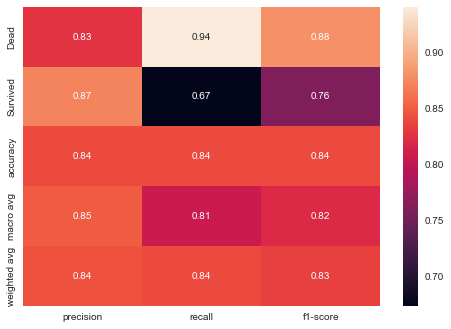

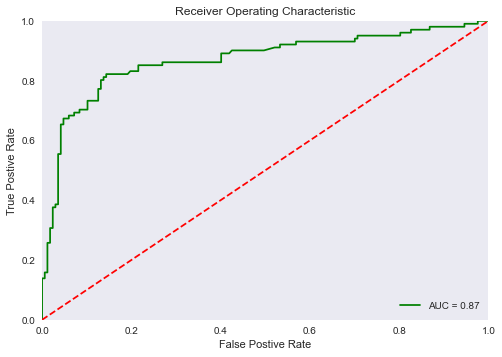

In [83]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
y_pred_prob = svm_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob, plot_roc=True)

#### 7) Logestic_regreesion

Test Accuracy: 82.46268656716418
F1 score: 0.7486631016042781
Recall: 0.693069306930693
Precision: 0.813953488372093

 confussion matrix:
 [[151  16]
 [ 31  70]]


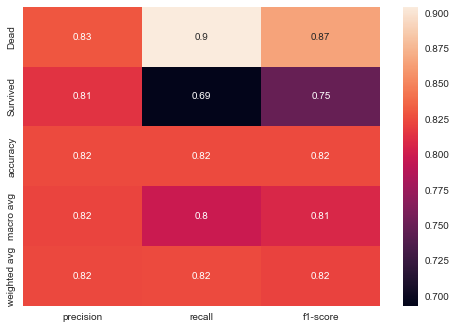

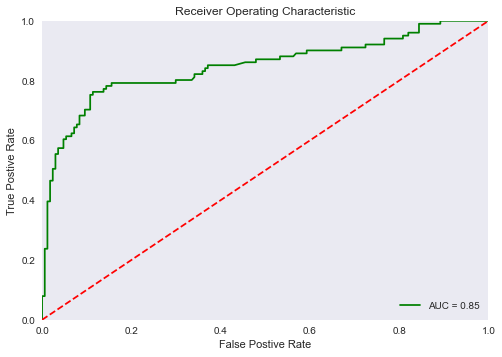

In [84]:
logestic_model = LogisticRegression()
logestic_model.fit(X_train, y_train)
y_pred = logestic_model.predict(X_test)
y_pred_prob = logestic_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob, plot_roc=True)

### Ensemble methods
* **RF**
* Bagging (bad)

### Boosting methods
* **XGBoost**
* AdaBoostClassifier (bad)
* GradientBoostingClassifier (bad)

Test Accuracy: 85.07462686567165
F1 score: 0.7849462365591399
Recall: 0.7227722772277227
Precision: 0.8588235294117647

 confussion matrix:
 [[155  12]
 [ 28  73]]


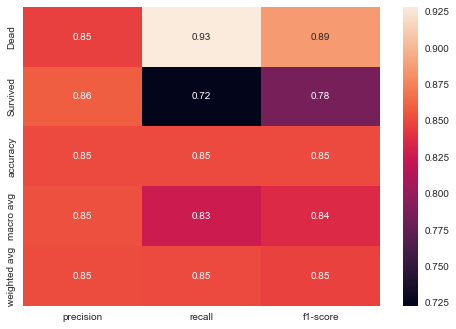

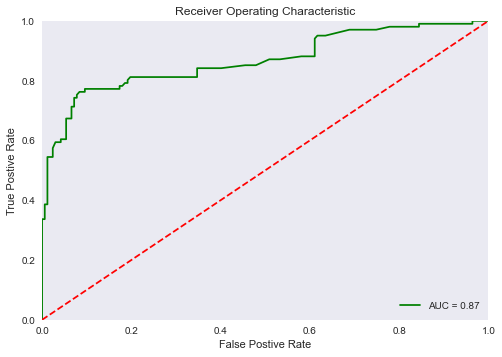

In [85]:
# Boosting -> AdaBoost
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob)

Test Accuracy: 83.5820895522388
F1 score: 0.7555555555555555
Recall: 0.6732673267326733
Precision: 0.8607594936708861

 confussion matrix:
 [[156  11]
 [ 33  68]]


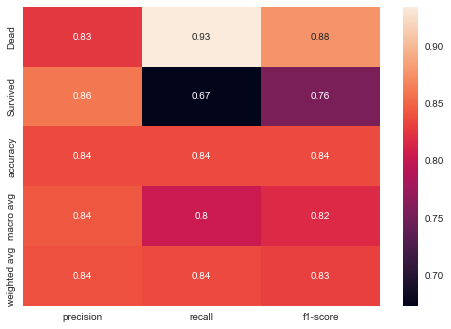

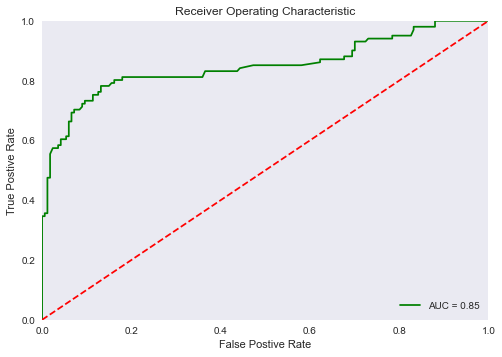

In [86]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob)

##### NN for Titanic
to know number of layers and nodes check out (number_of_features * no_of_nodes_layer_1 + no_of_nodes_layer_1 * no_of_nodes_layer_2)


In [87]:
len(X_train)

623

In [88]:
l = X_train.columns
l = len(l)
l

9

In [89]:
9 * 16 # 1st layer weights

144

In [90]:
9 * 16 + 16 * 32 # 1st + 2nd layer weights

656

In [91]:
# NN model - Tabular_Data
def titanic_model(hidden_units = 16, args = {}):
    my_input = tf.keras.Input(shape=(l,))
    x = tf.keras.layers.Dense(16, activation='relu', kernel_initializer= 'he_normal', bias_initializer= 'zeros', **args)(my_input)
    x = tf.keras.layers.Dense(32, activation='relu', kernel_initializer= 'he_normal', bias_initializer= 'zeros', **args)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(64, activation='relu', kernel_initializer= 'he_normal', bias_initializer= 'zeros', **args)(x)
    x = tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer= 'he_normal', bias_initializer= 'zeros', **args)(x)
    model = tf.keras.Model(inputs= my_input, outputs=[x])
    return model

In [92]:
def training(X_train, y_train, hidden_units = 512, learning_rate = 0.001, epochs = 500, opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), args = {}):
    model = titanic_model(hidden_units, args)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['binary_accuracy']) # accuracy -> regression
    history = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=32, verbose=2)
    return model, history
model, history = training(X_train, y_train)

Epoch 1/500
18/18 - 1s - loss: 0.7412 - binary_accuracy: 0.5839 - val_loss: 0.7089 - val_binary_accuracy: 0.6190 - 737ms/epoch - 41ms/step
Epoch 2/500
18/18 - 0s - loss: 0.6162 - binary_accuracy: 0.6714 - val_loss: 0.6481 - val_binary_accuracy: 0.6825 - 71ms/epoch - 4ms/step
Epoch 3/500
18/18 - 0s - loss: 0.5533 - binary_accuracy: 0.7339 - val_loss: 0.6191 - val_binary_accuracy: 0.6825 - 64ms/epoch - 4ms/step
Epoch 4/500
18/18 - 0s - loss: 0.5156 - binary_accuracy: 0.7714 - val_loss: 0.6047 - val_binary_accuracy: 0.6825 - 58ms/epoch - 3ms/step
Epoch 5/500
18/18 - 0s - loss: 0.4938 - binary_accuracy: 0.7625 - val_loss: 0.5914 - val_binary_accuracy: 0.7302 - 59ms/epoch - 3ms/step
Epoch 6/500
18/18 - 0s - loss: 0.4859 - binary_accuracy: 0.7893 - val_loss: 0.5824 - val_binary_accuracy: 0.7302 - 61ms/epoch - 3ms/step
Epoch 7/500
18/18 - 0s - loss: 0.4589 - binary_accuracy: 0.7946 - val_loss: 0.5756 - val_binary_accuracy: 0.6825 - 59ms/epoch - 3ms/step
Epoch 8/500
18/18 - 0s - loss: 0.4800 -

Epoch 61/500
18/18 - 0s - loss: 0.3720 - binary_accuracy: 0.8571 - val_loss: 0.5363 - val_binary_accuracy: 0.7619 - 58ms/epoch - 3ms/step
Epoch 62/500
18/18 - 0s - loss: 0.3883 - binary_accuracy: 0.8321 - val_loss: 0.5307 - val_binary_accuracy: 0.7778 - 57ms/epoch - 3ms/step
Epoch 63/500
18/18 - 0s - loss: 0.3783 - binary_accuracy: 0.8429 - val_loss: 0.5294 - val_binary_accuracy: 0.7778 - 58ms/epoch - 3ms/step
Epoch 64/500
18/18 - 0s - loss: 0.3719 - binary_accuracy: 0.8446 - val_loss: 0.5306 - val_binary_accuracy: 0.7778 - 56ms/epoch - 3ms/step
Epoch 65/500
18/18 - 0s - loss: 0.3768 - binary_accuracy: 0.8464 - val_loss: 0.5383 - val_binary_accuracy: 0.7619 - 55ms/epoch - 3ms/step
Epoch 66/500
18/18 - 0s - loss: 0.3629 - binary_accuracy: 0.8482 - val_loss: 0.5336 - val_binary_accuracy: 0.7619 - 60ms/epoch - 3ms/step
Epoch 67/500
18/18 - 0s - loss: 0.4007 - binary_accuracy: 0.8286 - val_loss: 0.5331 - val_binary_accuracy: 0.7619 - 63ms/epoch - 4ms/step
Epoch 68/500
18/18 - 0s - loss: 0.

Epoch 121/500
18/18 - 0s - loss: 0.3430 - binary_accuracy: 0.8696 - val_loss: 0.6104 - val_binary_accuracy: 0.7302 - 60ms/epoch - 3ms/step
Epoch 122/500
18/18 - 0s - loss: 0.3409 - binary_accuracy: 0.8571 - val_loss: 0.6127 - val_binary_accuracy: 0.7302 - 56ms/epoch - 3ms/step
Epoch 123/500
18/18 - 0s - loss: 0.3545 - binary_accuracy: 0.8554 - val_loss: 0.6028 - val_binary_accuracy: 0.7302 - 58ms/epoch - 3ms/step
Epoch 124/500
18/18 - 0s - loss: 0.3348 - binary_accuracy: 0.8643 - val_loss: 0.5978 - val_binary_accuracy: 0.7302 - 56ms/epoch - 3ms/step
Epoch 125/500
18/18 - 0s - loss: 0.3394 - binary_accuracy: 0.8607 - val_loss: 0.5964 - val_binary_accuracy: 0.7302 - 55ms/epoch - 3ms/step
Epoch 126/500
18/18 - 0s - loss: 0.3379 - binary_accuracy: 0.8643 - val_loss: 0.6000 - val_binary_accuracy: 0.7302 - 57ms/epoch - 3ms/step
Epoch 127/500
18/18 - 0s - loss: 0.3321 - binary_accuracy: 0.8696 - val_loss: 0.6095 - val_binary_accuracy: 0.7460 - 54ms/epoch - 3ms/step
Epoch 128/500
18/18 - 0s - 

Epoch 180/500
18/18 - 0s - loss: 0.3006 - binary_accuracy: 0.8857 - val_loss: 0.6653 - val_binary_accuracy: 0.7302 - 56ms/epoch - 3ms/step
Epoch 181/500
18/18 - 0s - loss: 0.3086 - binary_accuracy: 0.8732 - val_loss: 0.6647 - val_binary_accuracy: 0.7302 - 57ms/epoch - 3ms/step
Epoch 182/500
18/18 - 0s - loss: 0.3132 - binary_accuracy: 0.8732 - val_loss: 0.6484 - val_binary_accuracy: 0.7460 - 57ms/epoch - 3ms/step
Epoch 183/500
18/18 - 0s - loss: 0.3281 - binary_accuracy: 0.8679 - val_loss: 0.6496 - val_binary_accuracy: 0.7143 - 60ms/epoch - 3ms/step
Epoch 184/500
18/18 - 0s - loss: 0.3055 - binary_accuracy: 0.8821 - val_loss: 0.6572 - val_binary_accuracy: 0.7143 - 55ms/epoch - 3ms/step
Epoch 185/500
18/18 - 0s - loss: 0.3118 - binary_accuracy: 0.8768 - val_loss: 0.6672 - val_binary_accuracy: 0.7302 - 60ms/epoch - 3ms/step
Epoch 186/500
18/18 - 0s - loss: 0.3017 - binary_accuracy: 0.8839 - val_loss: 0.6643 - val_binary_accuracy: 0.7302 - 55ms/epoch - 3ms/step
Epoch 187/500
18/18 - 0s - 

Epoch 239/500
18/18 - 0s - loss: 0.2821 - binary_accuracy: 0.8821 - val_loss: 0.7302 - val_binary_accuracy: 0.7460 - 59ms/epoch - 3ms/step
Epoch 240/500
18/18 - 0s - loss: 0.3023 - binary_accuracy: 0.8786 - val_loss: 0.7282 - val_binary_accuracy: 0.7460 - 55ms/epoch - 3ms/step
Epoch 241/500
18/18 - 0s - loss: 0.2936 - binary_accuracy: 0.8875 - val_loss: 0.7315 - val_binary_accuracy: 0.7302 - 56ms/epoch - 3ms/step
Epoch 242/500
18/18 - 0s - loss: 0.2760 - binary_accuracy: 0.8804 - val_loss: 0.7171 - val_binary_accuracy: 0.7460 - 55ms/epoch - 3ms/step
Epoch 243/500
18/18 - 0s - loss: 0.2875 - binary_accuracy: 0.8857 - val_loss: 0.7249 - val_binary_accuracy: 0.7143 - 61ms/epoch - 3ms/step
Epoch 244/500
18/18 - 0s - loss: 0.2929 - binary_accuracy: 0.8768 - val_loss: 0.7324 - val_binary_accuracy: 0.7460 - 56ms/epoch - 3ms/step
Epoch 245/500
18/18 - 0s - loss: 0.2847 - binary_accuracy: 0.8857 - val_loss: 0.7252 - val_binary_accuracy: 0.7460 - 53ms/epoch - 3ms/step
Epoch 246/500
18/18 - 0s - 

Epoch 298/500
18/18 - 0s - loss: 0.2842 - binary_accuracy: 0.8839 - val_loss: 0.8557 - val_binary_accuracy: 0.7460 - 54ms/epoch - 3ms/step
Epoch 299/500
18/18 - 0s - loss: 0.2738 - binary_accuracy: 0.8893 - val_loss: 0.8533 - val_binary_accuracy: 0.7460 - 58ms/epoch - 3ms/step
Epoch 300/500
18/18 - 0s - loss: 0.2724 - binary_accuracy: 0.8857 - val_loss: 0.8456 - val_binary_accuracy: 0.7619 - 57ms/epoch - 3ms/step
Epoch 301/500
18/18 - 0s - loss: 0.2746 - binary_accuracy: 0.8911 - val_loss: 0.8425 - val_binary_accuracy: 0.7619 - 59ms/epoch - 3ms/step
Epoch 302/500
18/18 - 0s - loss: 0.2733 - binary_accuracy: 0.8911 - val_loss: 0.8435 - val_binary_accuracy: 0.7460 - 62ms/epoch - 3ms/step
Epoch 303/500
18/18 - 0s - loss: 0.2750 - binary_accuracy: 0.8875 - val_loss: 0.8428 - val_binary_accuracy: 0.7619 - 54ms/epoch - 3ms/step
Epoch 304/500
18/18 - 0s - loss: 0.2648 - binary_accuracy: 0.8946 - val_loss: 0.8505 - val_binary_accuracy: 0.7619 - 56ms/epoch - 3ms/step
Epoch 305/500
18/18 - 0s - 

Epoch 357/500
18/18 - 0s - loss: 0.2629 - binary_accuracy: 0.8875 - val_loss: 0.9620 - val_binary_accuracy: 0.7460 - 56ms/epoch - 3ms/step
Epoch 358/500
18/18 - 0s - loss: 0.2498 - binary_accuracy: 0.9000 - val_loss: 0.9586 - val_binary_accuracy: 0.7460 - 55ms/epoch - 3ms/step
Epoch 359/500
18/18 - 0s - loss: 0.2659 - binary_accuracy: 0.8929 - val_loss: 0.9612 - val_binary_accuracy: 0.7460 - 59ms/epoch - 3ms/step
Epoch 360/500
18/18 - 0s - loss: 0.2567 - binary_accuracy: 0.8982 - val_loss: 0.9609 - val_binary_accuracy: 0.7460 - 56ms/epoch - 3ms/step
Epoch 361/500
18/18 - 0s - loss: 0.2647 - binary_accuracy: 0.8875 - val_loss: 0.9757 - val_binary_accuracy: 0.7460 - 56ms/epoch - 3ms/step
Epoch 362/500
18/18 - 0s - loss: 0.2542 - binary_accuracy: 0.9036 - val_loss: 0.9795 - val_binary_accuracy: 0.7460 - 59ms/epoch - 3ms/step
Epoch 363/500
18/18 - 0s - loss: 0.2713 - binary_accuracy: 0.8857 - val_loss: 0.9721 - val_binary_accuracy: 0.7302 - 57ms/epoch - 3ms/step
Epoch 364/500
18/18 - 0s - 

Epoch 416/500
18/18 - 0s - loss: 0.2473 - binary_accuracy: 0.9036 - val_loss: 1.0406 - val_binary_accuracy: 0.7619 - 61ms/epoch - 3ms/step
Epoch 417/500
18/18 - 0s - loss: 0.2477 - binary_accuracy: 0.8929 - val_loss: 1.0580 - val_binary_accuracy: 0.7619 - 57ms/epoch - 3ms/step
Epoch 418/500
18/18 - 0s - loss: 0.2443 - binary_accuracy: 0.8964 - val_loss: 1.0562 - val_binary_accuracy: 0.7619 - 73ms/epoch - 4ms/step
Epoch 419/500
18/18 - 0s - loss: 0.2448 - binary_accuracy: 0.9054 - val_loss: 1.0740 - val_binary_accuracy: 0.7460 - 74ms/epoch - 4ms/step
Epoch 420/500
18/18 - 0s - loss: 0.2491 - binary_accuracy: 0.8982 - val_loss: 1.0655 - val_binary_accuracy: 0.7460 - 62ms/epoch - 3ms/step
Epoch 421/500
18/18 - 0s - loss: 0.2537 - binary_accuracy: 0.8964 - val_loss: 1.0447 - val_binary_accuracy: 0.7460 - 64ms/epoch - 4ms/step
Epoch 422/500
18/18 - 0s - loss: 0.2558 - binary_accuracy: 0.8946 - val_loss: 1.0402 - val_binary_accuracy: 0.7460 - 64ms/epoch - 4ms/step
Epoch 423/500
18/18 - 0s - 

Epoch 475/500
18/18 - 0s - loss: 0.2432 - binary_accuracy: 0.9036 - val_loss: 1.1947 - val_binary_accuracy: 0.7460 - 60ms/epoch - 3ms/step
Epoch 476/500
18/18 - 0s - loss: 0.2393 - binary_accuracy: 0.8982 - val_loss: 1.1683 - val_binary_accuracy: 0.7460 - 57ms/epoch - 3ms/step
Epoch 477/500
18/18 - 0s - loss: 0.2487 - binary_accuracy: 0.8875 - val_loss: 1.1819 - val_binary_accuracy: 0.7460 - 55ms/epoch - 3ms/step
Epoch 478/500
18/18 - 0s - loss: 0.2399 - binary_accuracy: 0.9036 - val_loss: 1.1643 - val_binary_accuracy: 0.7460 - 54ms/epoch - 3ms/step
Epoch 479/500
18/18 - 0s - loss: 0.2354 - binary_accuracy: 0.9071 - val_loss: 1.1607 - val_binary_accuracy: 0.7302 - 57ms/epoch - 3ms/step
Epoch 480/500
18/18 - 0s - loss: 0.2611 - binary_accuracy: 0.8857 - val_loss: 1.1372 - val_binary_accuracy: 0.7619 - 55ms/epoch - 3ms/step
Epoch 481/500
18/18 - 0s - loss: 0.2308 - binary_accuracy: 0.9071 - val_loss: 1.1389 - val_binary_accuracy: 0.7619 - 54ms/epoch - 3ms/step
Epoch 482/500
18/18 - 0s - 

In [93]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 0.8927 - binary_accuracy: 0.8209


[0.8927096724510193, 0.8208954930305481]

In [94]:
preds = model.predict(df_test)
preds

14/14 [==============================] - 0s 1ms/step


array([[6.31905794e-02],
       [1.35435760e-01],
       [1.05522817e-03],
       [1.06415167e-01],
       [4.56546605e-01],
       [2.23683313e-01],
       [9.83800963e-02],
       [3.13094002e-03],
       [9.82182145e-01],
       [9.92541318e-04],
       [8.42439458e-02],
       [3.99976730e-01],
       [1.00000000e+00],
       [8.98606144e-03],
       [1.00000000e+00],
       [9.99987423e-01],
       [2.47753114e-02],
       [5.30371778e-02],
       [8.49572476e-03],
       [5.22954427e-02],
       [9.66648698e-01],
       [9.81382191e-01],
       [1.00000000e+00],
       [9.79749978e-01],
       [1.00000000e+00],
       [1.64390786e-03],
       [1.00000000e+00],
       [9.56253782e-02],
       [4.72543508e-01],
       [1.45157985e-02],
       [1.81476977e-02],
       [8.88182782e-04],
       [3.95828858e-03],
       [1.80664077e-01],
       [5.88870227e-01],
       [9.31692496e-03],
       [4.89712417e-01],
       [4.79294717e-01],
       [8.00236389e-02],
       [1.19454108e-01],


In [95]:
preds = np.round(preds).astype('int32')
preds

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [96]:
df_submission = pd.DataFrame(df_test_passId.values, columns=['PassengerId'])
df_submission['Survived'] = preds
df_submission.to_csv('submission_NN.csv', index=False)

**Notes:**

based on Recall & Confusion matrx & F1score so we will use **RF & Naive & AdaBoostClassisfier** so hyperparameter tune Logestic

### Hyperparamter tunning using GridSearchCV

Model selected is logestic regression

In [97]:
# GaussianNB hyperparameters
'''
No hyperparameters to tune ^^

'''

'\nNo hyperparameters to tune ^^\n\n'

Test Accuracy: 81.34328358208955
F1 score: 0.7549019607843138
Recall: 0.7623762376237624
Precision: 0.7475728155339806

 confussion matrix:
 [[141  26]
 [ 24  77]]


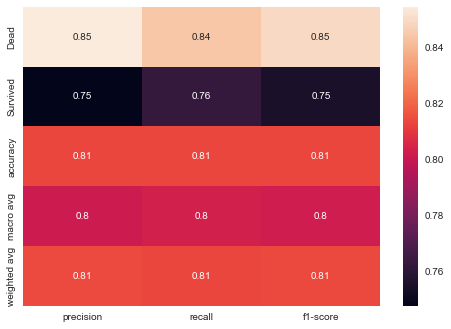

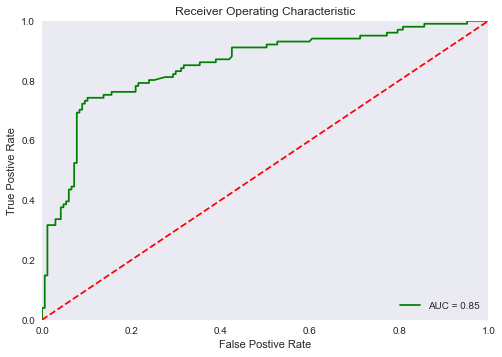

In [98]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_pred = NB_model.predict(X_test)
y_pred_prob = NB_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob)

In [99]:
# AdaBoostClassifier hyperparameters
'''
n_estimators: max number of estimators(models) - default is 50
learning_rate: 1.0 by default (weight for each estimator)
algorithm{‘SAMME’, ‘SAMME.R’} -default is SAMME.R converges faster

'''

model = AdaBoostClassifier() #model it's self
n_estimators = [50, 100, 150]
algorithm = ['SAMME', 'SAMME.R']
# learning_rate = [0.9, 1.0, 1.1]
learning_rate = np.arange(0.8, 1, 0.02)

# all possible hyperparameters
model_params = { 'n_estimators' : n_estimators,
               'algorithm' : algorithm,
               'learning_rate' : learning_rate}

# 3 * 3 * 2 = 18 so make cv=3 so be 54 model
sub_model = GridSearchCV(model, model_params, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

# Fit the grid
sub_model.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(sub_model.best_score_))
print("Best parameters: \n{}".format(sub_model.best_params_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best cross-validation score: 0.86
Best parameters: 
{'algorithm': 'SAMME', 'learning_rate': 0.9200000000000002, 'n_estimators': 150}


Test Accuracy: 85.82089552238806
F1 score: 0.7999999999999999
Recall: 0.7524752475247525
Precision: 0.8539325842696629

 confussion matrix:
 [[154  13]
 [ 25  76]]


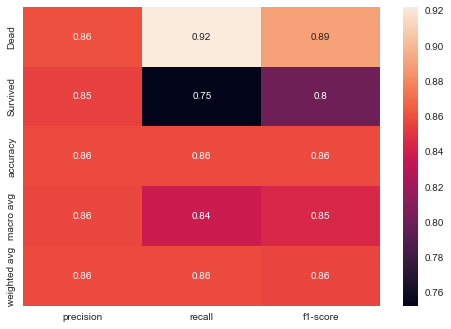

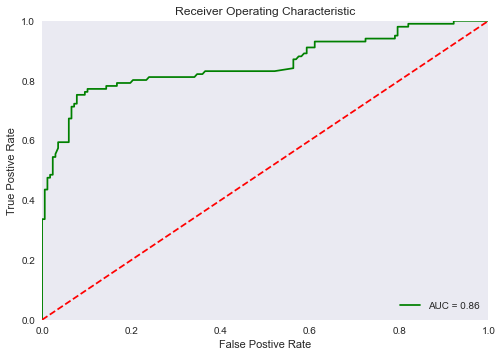

In [100]:
# tuned manually better xD -> 'SAMME.R', learning_rate = 0.8, n_estimators = 170
Ada_boost_model = AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate = 0.8, n_estimators = 170, random_state=5)
Ada_boost_model.fit(X_train,y_train)
y_pred = Ada_boost_model.predict(X_test)
y_pred_prob = Ada_boost_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob)

In [101]:
# RF hyperparameters
'''
** n_estimators = no of trees - default (100)
** criterion = split on which criteria {“gini”, “entropy”, "log_loss"}, gini: continues - less time no log / entropy: discrete - more time more accurate
but we will try both
max_depth = None - depth untill class is pure (default) so leave it as default which overfit but RF solve it
min_samples_split= min points to split just leave it default 
min_samples_leaf = default=1 min number of points to say it's leaf just leave it default
max_features= default is sqrt and it's good (sqrt max number of features to search which to split)
class_weight: for class imbalanced by "{class_label: weight}"
    for four-class multilabel: should be [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of [{1:1}, {2:5}, {3:1}, {4:1}].

'''

model = RandomForestClassifier(random_state = 5) #model it's self
n_estimators = [100, 50, 150]
criterion = ['gini', 'entropy']

# all possible hyperparameters
model_params = { 'n_estimators' : n_estimators,
               'criterion' : criterion}

# 3 * 2 = 5 so make cv=5 so be 25 model
sub_model = GridSearchCV(model, model_params, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

# Fit the grid
sub_model.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(sub_model.best_score_))
print("Best parameters: \n{}".format(sub_model.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best cross-validation score: 0.84
Best parameters: 
{'criterion': 'entropy', 'n_estimators': 100}


Test Accuracy: 83.2089552238806
F1 score: 0.7692307692307692
Recall: 0.7425742574257426
Precision: 0.7978723404255319

 confussion matrix:
 [[148  19]
 [ 26  75]]


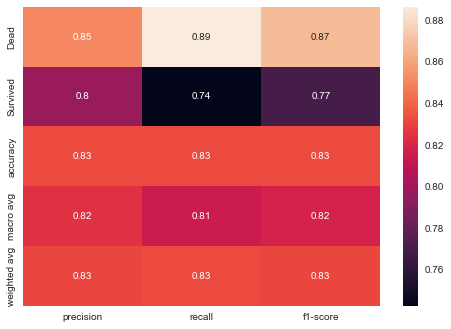

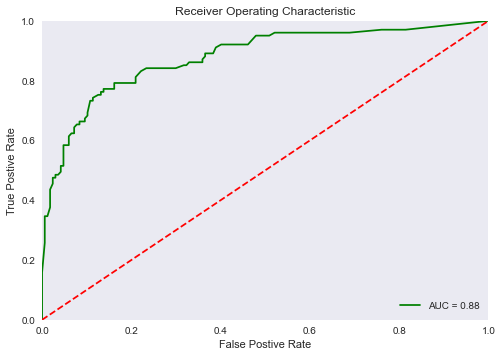

In [102]:
rf_model = RandomForestClassifier(random_state=12)
rf_model.fit(X_train, y_train.values.ravel())
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob)

In [103]:
# XGBoost hyperparameters
'''
** max_depth: (default is 6) increase it will make it overfit
0 -> no limit on depth. 

max_delta_step: help in class imbalanced: 1->10

subsample: 0.5 means next boosting model take only 50% of training data to prevent overfitting but it's not our case
sampling_method: uniform at subsample >= 0.5 (if model not overfit y3nye use it) or gradient_based subsample < 0.1

** lambda = 1 (l2 regualirazation to prevent overfiting) - default
alpha = 1 (l1) but we use l2

** scale_pos_weight: for class imbalanced and equals = sum(negative instances) / sum(positive instances) (which is 1 in our case - deafult value is 1 also)
process_type= (default: make new model - update: start from model and update)
** num_parallel_tree= 1 by default to make boosted RF
'''

model = XGBClassifier(random_state=5) #model it's self
max_depth = [3, 6, 12, 24]
subsample = [0.1, 0.5, 1.0]
num_parallel_tree = [1, 5, 10]

# all possible hyperparameters
model_params = { 'max_depth' : max_depth,
               'num_parallel_tree' : num_parallel_tree,
               'subsample': subsample}

# 4 * 3 = 12 * (cv = 3) = 36model
sub_model = GridSearchCV(model, model_params, cv = 3, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

# Fit the grid
sub_model.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(sub_model.best_score_))
print("Best parameters: \n{}".format(sub_model.best_params_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best cross-validation score: 0.86
Best parameters: 
{'max_depth': 3, 'num_parallel_tree': 10, 'subsample': 0.1}


Test Accuracy: 83.5820895522388
F1 score: 0.7608695652173914
Recall: 0.693069306930693
Precision: 0.8433734939759037

 confussion matrix:
 [[154  13]
 [ 31  70]]


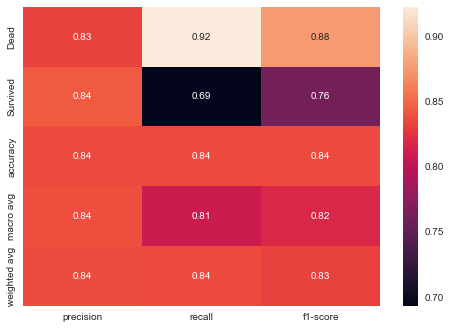

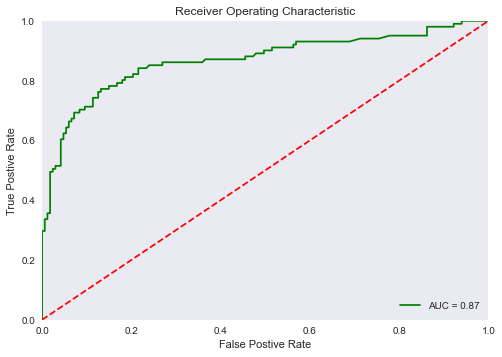

In [104]:
xgbc = XGBClassifier(max_depth = 3, num_parallel_tree = 10, subsample=0.1)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
y_pred_prob = xgbc.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob)

---

# Stack models
(you hyperparameter tune models first then stack them as if they are NN) in both regression and classification

* Regression using vecstack 

* Classification using StackingCVClassifier: you can hyperparamter tune last meta classifier only !!


In [105]:
# Stack models

# # 1. Stacking for regression
# from vecstack import stacking

# models = [rf, linear_model] # stack of models (calc as cv exactly)
# n_folds = 3
# S_train_A_vecstack, S_test_A_vecstack = stacking(models, X_train, y_train, X_test, regression=True, n_folds=n_folds,
#                                                  mode='oof_pred_bag', 
#                                                  random_state=0, 
#                                                  verbose=2) 

In [106]:
# 2. Stacking for classification
from mlxtend.classifier import StackingCVClassifier # <- Here is our boy

classifier1 = AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate = 0.8, n_estimators = 170, random_state=5)
classifier2 = GaussianNB()
classifier3 = XGBClassifier(max_depth = 3, num_parallel_tree = 10, subsample=0.1)
classifier4 = RandomForestClassifier(random_state=12)
num_of_classifier = 4 # classifier 1-> 4 in same stack 3ady
# SVC(probability = True) RandomForestClassifier(random_state=12)   GaussianNB()=>[best]
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4], shuffle = False,
                            use_probas = True, # to translate predictions
                            cv = 5,
                            meta_classifier = XGBClassifier()) # meta_classifier (2nd layer clasifer)

In [107]:
classifiers = {"AdaBoost": classifier1,
               "GaussianNB": classifier2,
               "XGBClassifier": classifier3,
               "RFClassifier": classifier4,
               "Stack": sclf}

# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier
    
# make predictions
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Ple

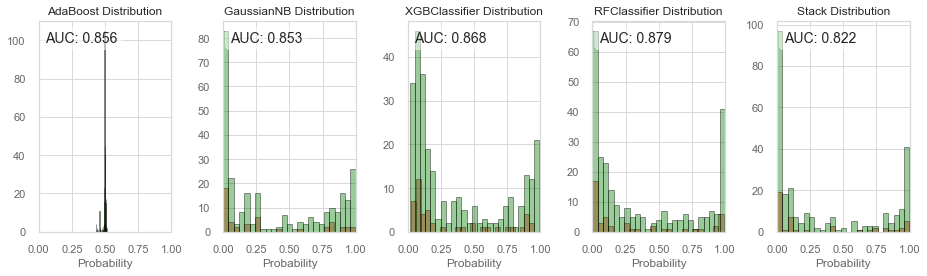

In [108]:
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, num_of_classifier), nrows=1, ncols = num_of_classifier+1)

for key, counter in zip(classifiers, range(num_of_classifier+1)):
    # Get predictions
    y_pred = results[key]
    
    # Get AUC
    auc = roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)

In [109]:
# tune meta-classifier hyperparameters only but rest should be tuned before "SVM" Kernel, c, degree, probability but we put
# meta_classifier__ b4 each hyperparameter as we have stack not svm!!

params = {"meta_classifier__kernel": ["linear", "rbf", "poly"],
          "meta_classifier__C": [1, 2],
          "meta_classifier__degree": [3, 4, 5],
          "meta_classifier__probability": [True]}

# model_params = { 'max_depth' : max_depth,
#                'num_parallel_tree' : num_parallel_tree,
#                'subsample': subsample}

params = {"meta_classifier__max_depth": max_depth,
          "meta_classifier__subsample": subsample
         }


# Initialize GridSearchCV
grid = GridSearchCV(estimator = sclf, 
                    param_grid = params, 
                    cv = 3,
                    scoring = "roc_auc", # accuracy, roc_auc
                    verbose = 10,
                    n_jobs = -1)

# Fit GridSearchCV
grid.fit(X_train, y_train)

# Making prediction on test set
y_pred = grid.predict_proba(X_test)[:,1]

# Getting AUC
auc = roc_auc_score(y_test, y_pred)

# Print results
print(f"The AUC of the tuned Stacking classifier is {auc:.3f}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]


The AUC of the tuned Stacking classifier is 0.819


In [110]:
import itertools
# Combinations of all stacks
classifier_labels = ["AdaBoost", "GaussianNB", "XGBClassifier", "RFClassifier"]
# classifier_labels = ["AdaBoost", "GaussianNB", "RFClassifier"]

# Get all unique combinations of classifier with a set size greater than or equal to 2
combo_classifiers = []
for ii in range(2, len(classifier_labels)+1):
    for subset in itertools.combinations(classifier_labels, ii):
        combo_classifiers.append(subset)

# Stack, tune, and evaluate stack of classifiers
for combo in combo_classifiers:
    # Get labels of classifier to create a stack
    labels = list(combo)
     
    # Get classifiers
    classifier_combo = []
    for ii in range(len(labels)):
        label = classifier_labels[ii]
        classifier = classifiers[label]
        classifier_combo.append(classifier)
         
    # Initializing the StackingCV classifier
    sclf = StackingCVClassifier(classifiers = classifier_combo,
                                shuffle = False,
                                use_probas = True,
                                cv = 5,
                                meta_classifier = XGBClassifier(), # SVC(probability = True) GaussianNB()
                                n_jobs = -1)
    # if no hyperparameters for output node
#     grid = sclf

#     # Grid search for meta classifier in each combo
#     # Initialize GridSearchCV
    grid = GridSearchCV(estimator = sclf, 
                        param_grid = params, 
                        cv = 3,
                        scoring = "roc_auc", # roc_auc
                        verbose = 0,
                        n_jobs = -1)
#     # Fit GridSearchCV
    grid.fit(X_train, y_train)
    
    # Making prediction on test set
    y_pred = grid.predict_proba(X_test)[:,1]
    
    # Getting AUC
    auc = roc_auc_score(y_test, y_pred)
    
    # Print results
    print(f"AUC of stack {combo}: {auc:.3f}")

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]


AUC of stack ('AdaBoost', 'GaussianNB'): 0.841


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]


AUC of stack ('AdaBoost', 'XGBClassifier'): 0.841


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]


AUC of stack ('AdaBoost', 'RFClassifier'): 0.841


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]


AUC of stack ('GaussianNB', 'XGBClassifier'): 0.841


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]


AUC of stack ('GaussianNB', 'RFClassifier'): 0.841


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]


AUC of stack ('XGBClassifier', 'RFClassifier'): 0.841


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]


AUC of stack ('AdaBoost', 'GaussianNB', 'XGBClassifier'): 0.866


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]


AUC of stack ('AdaBoost', 'GaussianNB', 'RFClassifier'): 0.866


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]


AUC of stack ('AdaBoost', 'XGBClassifier', 'RFClassifier'): 0.866


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]


AUC of stack ('GaussianNB', 'XGBClassifier', 'RFClassifier'): 0.866


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]


AUC of stack ('AdaBoost', 'GaussianNB', 'XGBClassifier', 'RFClassifier'): 0.819


**Best combination is: stack ('AdaBoost', 'GaussianNB', 'XGBClassifier'): 0.884* with meta-classifier='NBClassifier'* 

**(it may took whole day tho) and stacked trash is trach**

Test Accuracy: 81.71641791044776
F1 score: 0.7407407407407406
Recall: 0.693069306930693
Precision: 0.7954545454545454

 confussion matrix:
 [[149  18]
 [ 31  70]]


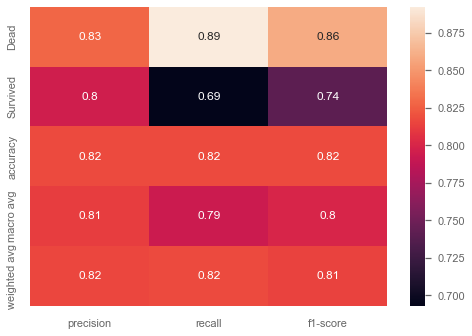

TypeError: 'numpy.float64' object is not callable

In [111]:
sclf.fit(X_train, y_train)
y_pred = sclf.predict(X_test)
y_pred_prob = sclf.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob)

# Kaggle Submission

In [112]:
df_submission = pd.DataFrame(df_test_passId.values, columns=['PassengerId'])
y_pred = NB_model.predict(df_test)
df_submission['Survived'] = y_pred
df_submission.to_csv('submission_nb.csv', index=False)

In [113]:
df_submission = pd.DataFrame(df_test_passId.values, columns=['PassengerId'])
y_pred = rf_model.predict(df_test)
df_submission['Survived'] = y_pred
df_submission.to_csv('submission_rf.csv', index=False)

In [114]:
y_pred = Ada_boost_model.predict(df_test)
df_submission['Survived'] = y_pred
df_submission.to_csv('submission_xgboost.csv', index=False)

In [115]:
df_submission = pd.DataFrame(df_test_passId.values, columns=['PassengerId'])
y_pred = sclf.predict(df_test)
df_submission['Survived'] = y_pred
df_submission.to_csv('submission_sclf.csv', index=False)

# Experiments Result
* Experiment 1&2 for duplicates           => as dataset is small (so don't remove duplicates)
* Experiment 3&4 for outliers             => don't remove outliers as values are in same range it's okay 3ady
* Experiment 5&6 for kmeans on/off        => Yes cluster it's important
* Experiment 7&8 for PCA                  => Don't PCA as not alot features to compress
* Experiment 9&10 for Remove Cat Outliers => remove catgorical records as we didnt remove duplicates (it overfit our model)

الحمد لله الذي وفقني لهذا